# **Preliminary Project Statement:** 
For a given heart disease dataset, we want to predict the presence of the heart disease based on the patient attributes using classification.


**Well defined Question:**

How accurately can we predict the presence of heart disease using classification?


---
[Heart Disease Dataset](https://archive.ics.uci.edu/ml/datasets/Heart+Disease?spm=5176.100239.blogcont54260.8.TRNGoO)

**Data Set Information:**

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.

To see Test Costs (donated by Peter Turney), please see the folder "Costs" 


---
**14 Attributes used:**

age, sex, cp, trestbps,chol, fbs, restecg,thalach, exang, oldpeak, slope, ca, thal,num

**Description of 13 Input variables**

**Age:** age of the patient

**Sex:**

0: Female

1: Male

**Chest Pain Type (cp):**

0: Typical Angina

1: Atypical Angina

2: Non-Anginal Pain

3: Asymptomatic

**Resting Blood Pressure:** Person's resting blood pressure(trestbps).

**Cholesterol (chol):** Serum Cholesterol in mg/dl

**Fasting Blood Sugar (fbs):**

0:Less Than 120mg/ml

1: Greater Than 120mg/ml

**Resting Electrocardiographic Measurement(restecg):**

0: Normal

1: ST-T Wave Abnormality

2: Left Ventricular Hypertrophy

**Max Heart Rate Achieved (thalch):** Maximum Heart Rate Achieved 

**Exercise Induced Angina (exang):**

1: Yes

0: No

**ST Depression (oldpeak):** ST depression induced by exercise relative to rest.
**Slope:** Slope of the peak exercise ST segment (slope):

0: Upsloping

1: Flat

2: Downsloping

**Thalassemia (thal):** A blood disorder called 'Thalassemia' :

0: Normal

1: Fixed Defect

2: Reversible Defect

**Number of Major Vessels (ca):** Number of major vessels colored by fluoroscopy.

** 1 Output variables:** 
**num:** diagnosis of heart disease (angiographic disease status): 
    
 0-  < 50% diameter narrowing 
 
 1- > 50% diameter narrowing

---


##**Library Import**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# compare knn imputation strategies for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

##**Loading all the dataset**

**Upload the Cleveland Data**

In [3]:
#upload the file in the lab
from google.colab import files
uploaded = files.upload()
#read the datafile using pandas read_csv


Saving processed.cleveland.data to processed.cleveland.data


In [4]:
import io
cleveland_df= pd.read_csv(io.BytesIO(uploaded['processed.cleveland.data']), header=None)
cleveland_df.columns = ["age", "sex", "cp", "trestbps","chol", "fbs", "restecg","thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
cleveland_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


**Upload Switzerland data**

In [5]:
#upload the file in the lab
from google.colab import files
uploaded = files.upload()
#read the datafile using pandas read_csv
import io
switzerland_df= pd.read_csv(io.BytesIO(uploaded['processed.switzerland_chol_missing.txt']), header=None)
switzerland_df.columns = ["age", "sex", "cp", "trestbps","chol", "fbs", "restecg","thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
switzerland_df 


Saving processed.switzerland_chol_missing.txt to processed.switzerland_chol_missing.txt


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,32,1,1,95,?,?,0,127,0,.7,1,?,?,1
1,34,1,4,115,?,?,?,154,0,.2,1,?,?,1
2,35,1,4,?,?,?,0,130,1,?,?,?,7,3
3,36,1,4,110,?,?,0,125,1,1,2,?,6,1
4,38,0,4,105,?,?,0,166,0,2.8,1,?,?,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,70,1,4,115,?,0,1,92,1,0,2,?,7,1
119,70,1,4,140,?,1,0,157,1,2,2,?,7,3
120,72,1,3,160,?,?,2,114,0,1.6,2,2,?,0
121,73,0,3,160,?,0,1,121,0,0,1,?,3,1


**Upload the Hungarian dataset**

In [6]:
#upload the file in the lab
from google.colab import files
uploaded = files.upload()
#read the datafile using pandas read_csv
import io
hungarian_df= pd.read_csv(io.BytesIO(uploaded['processed.hungarian.data']), header=None)
hungarian_df.columns = ["age", "sex", "cp", "trestbps","chol", "fbs", "restecg","thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
hungarian_df 

Saving processed.hungarian.data to processed.hungarian.data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
290,54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
291,56,1,4,155,342,1,0,150,1,3.0,2,?,?,1
292,58,0,2,180,393,0,0,110,1,1.0,2,?,7,1


**Upload the VA dataset**

In [7]:
#upload the file in the lab
from google.colab import files
uploaded = files.upload()
#read the datafile using pandas read_csv
import io
va_df= pd.read_csv(io.BytesIO(uploaded['processed.va.data']), header=None)
va_df.columns = ["age", "sex", "cp", "trestbps","chol", "fbs", "restecg","thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
va_df 


Saving processed.va.data to processed.va.data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


**Shape of the datasets**

In [8]:
print(" Cleveland dataset: ( rows, columns) = ",cleveland_df.shape)
print(" Switzerland dataset: ( rows, columns) = ",switzerland_df.shape)
print(" Hungarian dataset: ( rows, columns) = ",hungarian_df.shape)
print(" VA dataset: ( rows, columns) = ",va_df.shape)


 Cleveland dataset: ( rows, columns) =  (303, 14)
 Switzerland dataset: ( rows, columns) =  (123, 14)
 Hungarian dataset: ( rows, columns) =  (294, 14)
 VA dataset: ( rows, columns) =  (200, 14)


**Check the missing values in each columns**

In [9]:
# Missing data in Cleveland dataset marking as Nan and finding its frequency in each column
cleveland_df = cleveland_df.replace('?', np.nan)
cleveland_nan = pd.DataFrame(cleveland_df.isnull().sum())
cleveland_nan

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [10]:
# Missing data in Switzerland dataset marking as Nan and finding its frequency in each column
switzerland_df = switzerland_df.replace('?', np.nan)
switzerland_nan = pd.DataFrame(switzerland_df.isnull().sum())
switzerland_nan

,0
age,0
sex,0
cp,0
trestbps,2
chol,123
fbs,75
restecg,1
thalach,1
exang,1
oldpeak,6


In [11]:
# Missing data in Hungarian dataset marking as Nan and finding its frequency in each column
hungarian_df = hungarian_df.replace('?', np.nan)
hungarian_nan = pd.DataFrame(hungarian_df.isnull().sum())
hungarian_nan

,0
age,0
sex,0
cp,0
trestbps,1
chol,23
fbs,8
restecg,1
thalach,1
exang,1
oldpeak,0


In [12]:
# Missing data in VA dataset marking as Nan and finding its frequency in each column
va_df = va_df.replace('?', np.nan)
va_nan = pd.DataFrame(va_df.isnull().sum())
va_nan

,0
age,0
sex,0
cp,0
trestbps,56
chol,7
fbs,7
restecg,0
thalach,53
exang,53
oldpeak,56


**Descriptive statistics of the each features( this will help use to identify some type errors or sometimes zero rows**

In [13]:
cleveland_df.describe(include='all')


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299,301,303.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176,166,NaN
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,NaN,NaN,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,NaN,NaN,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,NaN,NaN,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,NaN,NaN,2.000000


In [14]:
switzerland_df.describe(include='all')


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,123.000000,123.000000,123.000000,121,0.0,48,122,122,122,117,106,5,71,123.000000
unique,NaN,NaN,NaN,20,NaN,2,3,67,2,35,3,2,3,NaN
top,NaN,NaN,NaN,115,NaN,0,0,120,0,0,2,2,7,NaN
freq,NaN,NaN,NaN,14,NaN,43,85,9,68,42,61,3,42,NaN
mean,55.317073,0.918699,3.699187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.804878
std,9.032108,0.274414,0.688726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.013503
min,32.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,51.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,56.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
75%,61.500000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000


In [15]:
hungarian_df.describe(include="all")


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,294.000000,294.000000,294.000000,293,271,286,293,293,293,294.000000,104,3,28,294.000000
unique,NaN,NaN,NaN,31,153,2,3,71,2,NaN,3,1,3,NaN
top,NaN,NaN,NaN,120,230,0,0,150,0,NaN,2,0,7,NaN
freq,NaN,NaN,NaN,65,5,266,235,29,204,NaN,91,3,11,NaN
mean,47.826531,0.724490,2.982993,NaN,NaN,NaN,NaN,NaN,NaN,0.586054,NaN,NaN,NaN,0.360544
std,7.811812,0.447533,0.965117,NaN,NaN,NaN,NaN,NaN,NaN,0.908648,NaN,NaN,NaN,0.480977
min,28.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,42.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000
50%,49.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000
75%,54.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000


In [16]:
va_df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,200.000000,200.000000,200.000000,144,193,193,200.000000,147,147,144,98,2,34,200.000000
unique,NaN,NaN,NaN,40,99,2,NaN,59,2,14,3,1,3,NaN
top,NaN,NaN,NaN,120,0,0,NaN,140,1,0,2,0,7,NaN
freq,NaN,NaN,NaN,16,49,125,NaN,12,95,40,53,2,22,NaN
mean,59.350000,0.970000,3.505000,NaN,NaN,NaN,0.735000,NaN,NaN,NaN,NaN,NaN,NaN,1.520000
std,7.811697,0.171015,0.795701,NaN,NaN,NaN,0.683455,NaN,NaN,NaN,NaN,NaN,NaN,1.219441
min,35.000000,0.000000,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,55.000000,1.000000,3.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,60.000000,1.000000,4.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,64.000000,1.000000,4.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000


#**Data Cleaning**

 ## Basic Data cleaning


Redantant columns : 

**Identifying the columns with single values:**  Delete them

**Identifying  the columns with very few values but more than one:**

Be careful before deleting as it might be representing the categorical dataset. 



  

In [17]:
# Checking for Redundant columns

print("\n\nUnique column values in Cleveland dataset\n", cleveland_df.nunique())




Unique column values in Cleveland dataset
 age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            4
thal          3
num           5
dtype: int64


In [18]:
# Checking for Redundant columns
print("\n\nUnique column values in Switzerland dataset\n", switzerland_df.nunique())



Unique column values in Switzerland dataset
 age         37
sex          2
cp           4
trestbps    20
chol         0
fbs          2
restecg      3
thalach     67
exang        2
oldpeak     35
slope        3
ca           2
thal         3
num          5
dtype: int64


In [19]:
# Checking for Redundant columns
print("\n\nUnique column values in Hungarian dataset\n", hungarian_df.nunique())




Unique column values in Hungarian dataset
 age          38
sex           2
cp            4
trestbps     31
chol        153
fbs           2
restecg       3
thalach      71
exang         2
oldpeak      10
slope         3
ca            1
thal          3
num           2
dtype: int64


In [20]:
# Checking for Redundant columns
print("\n\nUnique column values in VA dataset\n", va_df.nunique())



Unique column values in VA dataset
 age         39
sex          2
cp           4
trestbps    40
chol        99
fbs          2
restecg      3
thalach     59
exang        2
oldpeak     14
slope        3
ca           1
thal         3
num          5
dtype: int64


**Decision:** No column has only one value and the columns with very few values(more than one) are categorical columns.. not deleting any  

*Basic data cleaning*

Duplicate Rows

In [21]:
dups_cleveland=cleveland_df.duplicated()
print(dups_cleveland.any())
print(cleveland_df[dups_cleveland])

False
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, num]
Index: []


In [22]:
dups_switzerland=switzerland_df.duplicated()
print(dups_switzerland.any())
print(switzerland_df[dups_switzerland])

False
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, num]
Index: []


In [23]:
dups_hungarian= hungarian_df.duplicated()
print(dups_hungarian.any())
print(hungarian_df[dups_hungarian])

True
     age  sex  cp trestbps chol fbs  ... exang oldpeak slope   ca thal num
102   49    0   2      110  NaN   0  ...     0     0.0   NaN  NaN  NaN   0

[1 rows x 14 columns]


In [24]:
dups_va= va_df.duplicated()
print(dups_va.any())
print(va_df[dups_va])

True
     age  sex  cp trestbps chol fbs  ...  exang oldpeak slope   ca thal num
187   58    1   3      150  219   0  ...      1       0   NaN  NaN  NaN   2

[1 rows x 14 columns]


#**Imuputation**
We will run *KNN imputer* and *Iterative imputer* on 5 different combination of dataframes as follows:


In [25]:

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


import os
import warnings

warnings.filterwarnings('ignore')

##**Creating different Dataframes**

Below are the combination of different dataset 
1. Cleveland , hungarian , switzerland , Va
2. Cleveland , hungarian  
3. Cleveland , switzerland
4. Cleveland , hungarian , switzerland
5. Cleveland


We are trying to find best K value for KNN_Imputer by applying RandomforestClassifier to find bext accuracy

###**1. Cleveland + hungarian + switzerland + Va**

In [26]:
#Complete dataset
Heart_Disease_DF = pd.concat([cleveland_df,hungarian_df,switzerland_df,va_df])
Heart_Disease_DF.shape

(920, 14)

###**2. Cleveland + hungarian**

In [27]:
Clev_hung_df = pd.concat([cleveland_df,hungarian_df])

###**3. Cleveland + switzerland**

In [28]:
Clev_switz_df = pd.concat([cleveland_df,switzerland_df])

###**4. Cleveland + switzerland + hungarian**

In [29]:
Clev_hung_switz_df = pd.concat([cleveland_df,hungarian_df,switzerland_df])

###**--------------------KNN imputation-------------------------**


###**KNN Imputer** 

* Use MinMaxScaler to scale X
* Converting target variables to binary


In [30]:
#function to optimize the knn imputer
def optimize_knn_imputer(data, target,name):
    results = list()
    dict = {'Name':[],
        'K':[],
        'MeanAccuracy':[],
        'stdAccuracy':[]
       }
    df = pd.DataFrame(dict)
    for s in range(1, 50, 2):
        imputer = KNNImputer(n_neighbors=s, weights='distance', metric='nan_euclidean')
        array = data.values
        X = array [:,:-1]
        Y = data[target]
        
        #converting target variables to binary
        data['num'][data.num >0] = 1
        Y_temp = data['num']

    
        trans = MinMaxScaler()
        trans_X = trans.fit_transform(X)
        
        X_imputed = imputer.fit_transform(trans_X)
        X_imputed_df = pd.DataFrame(X_imputed, columns=data.drop(target, axis=1).columns)
        
        model = RandomForestClassifier()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(model, X_imputed, Y_temp, scoring='accuracy', cv=cv, n_jobs=-1)       
        results.append(scores)
        df.loc[len(df.index)] = [name, s, mean(scores), std(scores)] 
        #print('>K : %s --> Mean : %.3f --> Std : (%.3f)' % (s, mean(scores), std(scores)))   
    #max(results)
    display(df)
    pyplot.boxplot(results, labels=range(1, 50, 2), showmeans=True)
    pyplot.show()
    return df
    #df.loc[df['MeanAccuracy'] == df['MeanAccuracy'].max()] 

###**1. KNN imputation on Cleveland + hungarian + switzerland + Va**

,Name,K,MeanAccuracy,stdAccuracy
0,cleveland+hungarian+switzerland+va,1.0,0.803261,0.035870
1,cleveland+hungarian+switzerland+va,3.0,0.814855,0.028550
2,cleveland+hungarian+switzerland+va,5.0,0.812681,0.034336
3,cleveland+hungarian+switzerland+va,7.0,0.808696,0.032681
4,cleveland+hungarian+switzerland+va,9.0,0.814493,0.029157
5,cleveland+hungarian+switzerland+va,11.0,0.816667,0.028446
6,cleveland+hungarian+switzerland+va,13.0,0.820290,0.029666
7,cleveland+hungarian+switzerland+va,15.0,0.819203,0.030933
8,cleveland+hungarian+switzerland+va,17.0,0.821377,0.028988
9,cleveland+hungarian+switzerland+va,19.0,0.819203,0.029897


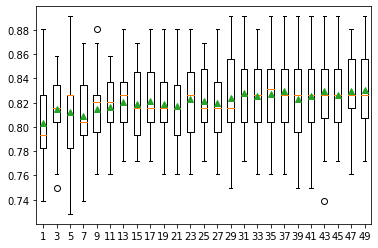

In [31]:
df1 = optimize_knn_imputer(Heart_Disease_DF,'num','cleveland+hungarian+switzerland+va')

In [32]:
df1.loc[df1['MeanAccuracy'] == df1['MeanAccuracy'].max()] 
# getting slightly different result than anwesh

,Name,K,MeanAccuracy,stdAccuracy
24,cleveland+hungarian+switzerland+va,49.0,0.830797,0.031212


###**2. KNN imputation on Cleveland + hungarian**

,Name,K,MeanAccuracy,stdAccuracy
0,cleveland+hungarian,1.0,0.825245,0.044839
1,cleveland+hungarian,3.0,0.841450,0.038988
2,cleveland+hungarian,5.0,0.835885,0.042712
3,cleveland+hungarian,7.0,0.836507,0.044922
4,cleveland+hungarian,9.0,0.833079,0.040550
5,cleveland+hungarian,11.0,0.835311,0.043369
6,cleveland+hungarian,13.0,0.843682,0.034291
7,cleveland+hungarian,15.0,0.838682,0.042018
8,cleveland+hungarian,17.0,0.836450,0.040400
9,cleveland+hungarian,19.0,0.835866,0.036932


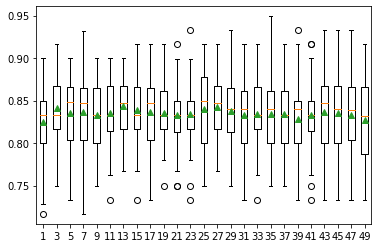

In [33]:
df2 = optimize_knn_imputer(Clev_hung_df,'num','cleveland+hungarian')

In [34]:
df2.loc[df2['MeanAccuracy'] == df2['MeanAccuracy'].max()] 

,Name,K,MeanAccuracy,stdAccuracy
6,cleveland+hungarian,13.0,0.843682,0.034291


###**3. KNN imputation on Cleveland + Switzerland**

,Name,K,MeanAccuracy,stdAccuracy
0,cleveland+switzerland,1.0,0.817737,0.059964
1,cleveland+switzerland,3.0,0.832595,0.058827
2,cleveland+switzerland,5.0,0.835677,0.051058
3,cleveland+switzerland,7.0,0.842820,0.057855
4,cleveland+switzerland,9.0,0.845847,0.058624
5,cleveland+switzerland,11.0,0.855279,0.048040
6,cleveland+switzerland,13.0,0.852879,0.056151
7,cleveland+switzerland,15.0,0.850591,0.056380
8,cleveland+switzerland,17.0,0.850480,0.052781
9,cleveland+switzerland,19.0,0.848985,0.059259


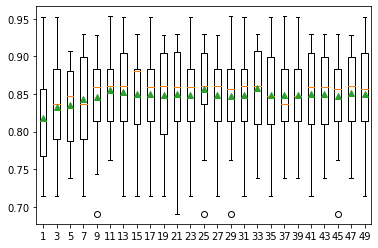

In [35]:
df3 = optimize_knn_imputer(Clev_switz_df,'num','cleveland+switzerland')

In [36]:
df3.loc[df3['MeanAccuracy'] == df3['MeanAccuracy'].max()] 

,Name,K,MeanAccuracy,stdAccuracy
16,cleveland+switzerland,33.0,0.858453,0.058547


###**4. KNN imputation on Cleveland + hungarian + switzerland**

,Name,K,MeanAccuracy,stdAccuracy
0,cleveland+hungarian+switzerland,1.0,0.823611,0.036598
1,cleveland+hungarian+switzerland,3.0,0.829630,0.036735
2,cleveland+hungarian+switzerland,5.0,0.834722,0.033130
3,cleveland+hungarian+switzerland,7.0,0.828241,0.038033
4,cleveland+hungarian+switzerland,9.0,0.827315,0.036691
5,cleveland+hungarian+switzerland,11.0,0.831019,0.033078
6,cleveland+hungarian+switzerland,13.0,0.841667,0.035789
7,cleveland+hungarian+switzerland,15.0,0.837037,0.031249
8,cleveland+hungarian+switzerland,17.0,0.840741,0.031208
9,cleveland+hungarian+switzerland,19.0,0.840741,0.039404


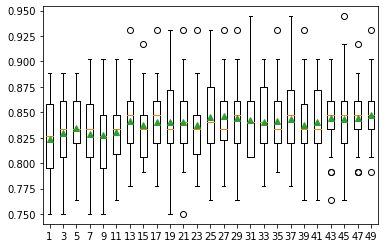

In [37]:
df4 = optimize_knn_imputer(Clev_hung_switz_df,'num','cleveland+hungarian+switzerland')

In [38]:
df4.loc[df4['MeanAccuracy'] == df4['MeanAccuracy'].max()] 

,Name,K,MeanAccuracy,stdAccuracy
24,cleveland+hungarian+switzerland,49.0,0.847222,0.029572


###**5. KNN imputation on Cleveland**

,Name,K,MeanAccuracy,stdAccuracy
0,cleveland,1.0,0.817455,0.057901
1,cleveland,3.0,0.821685,0.058627
2,cleveland,5.0,0.830538,0.046549
3,cleveland,7.0,0.814050,0.055752
4,cleveland,9.0,0.814050,0.050204
5,cleveland,11.0,0.818459,0.058880
6,cleveland,13.0,0.827276,0.054930
7,cleveland,15.0,0.826201,0.057519
8,cleveland,17.0,0.828387,0.057430
9,cleveland,19.0,0.824982,0.049982


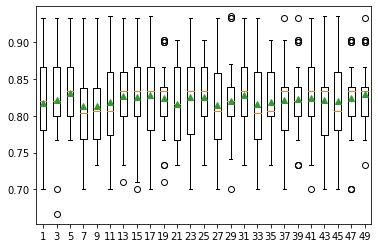

In [39]:
df5 = optimize_knn_imputer(cleveland_df,'num','cleveland')

In [40]:
df5.loc[df5['MeanAccuracy'] == df5['MeanAccuracy'].max()] 

,Name,K,MeanAccuracy,stdAccuracy
2,cleveland,5.0,0.830538,0.046549


#**Iterative Imputation-**

---



##**Iterative Imputer**

In [41]:
def optimize_IterativeImputer_imputer(data, target,name):

    results = list()
    dict={'Name': [],
          'ImputationOrder' : [],
          'Mean_Accuracy':[],
          'std_Dev':[]
    }
    df=pd.DataFrame(dict)
    for s in ['ascending', 'descending', 'roman', 'arabic', 'random']:
        #imputer = KNNImputer(n_neighbors=s, weights='distance', metric='nan_euclidean')
        imputer = IterativeImputer(imputation_order=s)
        array = data.values
        X = array [:,:-1]
        Y = data[target]
        
        #Converting Target Variables to Binary
        data['num'][data.num >0] = 1
        Y_temp = data['num']

        trans = MinMaxScaler()
        trans_X = trans.fit_transform(X)
        
        X_imputed = imputer.fit_transform(trans_X)
        X_imputed_df = pd.DataFrame(X_imputed, columns=data.drop(target, axis=1).columns)
        
        model = RandomForestClassifier()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(model, X_imputed, Y_temp, scoring='accuracy', cv=cv, n_jobs=-1)       
        results.append(scores)
        #print(' %s --> Mean : %.3f --> Std : (%.3f)' % (s, mean(scores), std(scores)))  
        df.loc[len(df.index)] = [name, s, mean(scores), std(scores)] 
    display(df)
    plt.boxplot(results, labels=['ascending', 'descending', 'roman', 'arabic', 'random'], showmeans=True)
    plt.show()
    return df

###**1. Iterative imputation on Cleveland + Hungarian + Switzerland + VA**

,Name,ImputationOrder,Mean_Accuracy,std_Dev
0,Clevel + Hung + Switz + VA,ascending,0.819928,0.028577
1,Clevel + Hung + Switz + VA,descending,0.826087,0.029301
2,Clevel + Hung + Switz + VA,roman,0.822101,0.029897
3,Clevel + Hung + Switz + VA,arabic,0.822101,0.030678
4,Clevel + Hung + Switz + VA,random,0.823551,0.030316


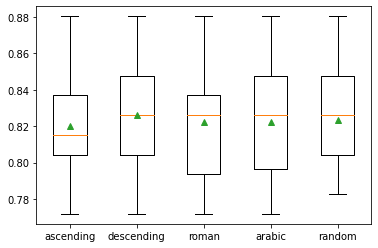

In [42]:
df1_imput=optimize_IterativeImputer_imputer(Heart_Disease_DF,'num','Clevel + Hung + Switz + VA')

In [43]:
# Trying to print the max.. but getting an error.. if you can please feel free to solve it.. aim is to print the best score
df1_imput.loc[df1_imput['Mean_Accuracy'] == df1_imput['Mean_Accuracy'].max()] 

,Name,ImputationOrder,Mean_Accuracy,std_Dev
1,Clevel + Hung + Switz + VA,descending,0.826087,0.029301


###**2. Iterative imputation on Cleveland + Hungarian**

,Name,ImputationOrder,Mean_Accuracy,std_Dev
0,clev+hung,ascending,0.831431,0.040234
1,clev+hung,descending,0.832524,0.040350
2,clev+hung,roman,0.835923,0.048938
3,clev+hung,arabic,0.829171,0.043118
4,clev+hung,random,0.834802,0.044530


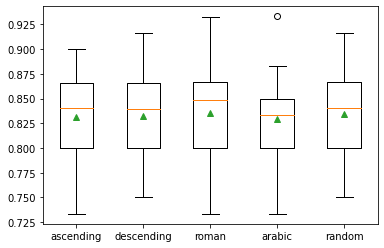

In [44]:
df2_imput=optimize_IterativeImputer_imputer(Clev_hung_df,'num','clev+hung')

In [45]:
df2_imput.loc[df2_imput['Mean_Accuracy'] == df2_imput['Mean_Accuracy'].max()] 

,Name,ImputationOrder,Mean_Accuracy,std_Dev
2,clev+hung,roman,0.835923,0.048938


###**3. Iterative imputation on Cleveland + Switzerland**

,Name,ImputationOrder,Mean_Accuracy,std_Dev
0,Clev+Switz,ascending,0.844297,0.053928
1,Clev+Switz,descending,0.847453,0.055865
2,Clev+Switz,roman,0.845072,0.052552
3,Clev+Switz,arabic,0.848210,0.058157
4,Clev+Switz,random,0.846659,0.050021


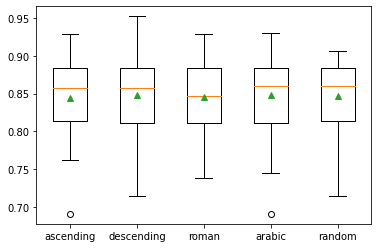

In [46]:
df3_imput = optimize_IterativeImputer_imputer(Clev_switz_df,'num','Clev+Switz')

In [47]:
df3_imput.loc[df3_imput['Mean_Accuracy'] == df3_imput['Mean_Accuracy'].max()] 

,Name,ImputationOrder,Mean_Accuracy,std_Dev
3,Clev+Switz,arabic,0.84821,0.058157


###**4. Iterative imputation on Cleveland + Hungarian + Switzerland**

,Name,ImputationOrder,Mean_Accuracy,std_Dev
0,Cleve+Hung+Switz,ascending,0.835648,0.029152
1,Cleve+Hung+Switz,descending,0.843981,0.029935
2,Cleve+Hung+Switz,roman,0.836111,0.033140
3,Cleve+Hung+Switz,arabic,0.837500,0.031498
4,Cleve+Hung+Switz,random,0.839815,0.032022


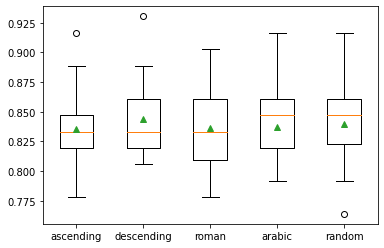

In [48]:
df4_imput=optimize_IterativeImputer_imputer(Clev_hung_switz_df,'num','Cleve+Hung+Switz')

In [49]:
df4_imput.loc[df4_imput['Mean_Accuracy'] == df4_imput['Mean_Accuracy'].max()] 

,Name,ImputationOrder,Mean_Accuracy,std_Dev
1,Cleve+Hung+Switz,descending,0.843981,0.029935


###**5. Iterative imputation on Cleveland**

,Name,ImputationOrder,Mean_Accuracy,std_Dev
0,Cleveland,ascending,0.823978,0.055973
1,Cleveland,descending,0.816380,0.056624
2,Cleveland,roman,0.814122,0.055315
3,Cleveland,arabic,0.830502,0.051771
4,Cleveland,random,0.830538,0.055776


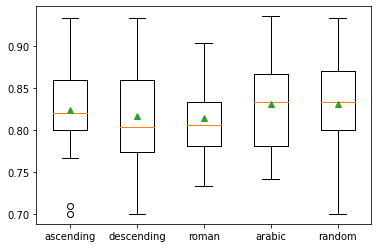

In [50]:
df5_imput=optimize_IterativeImputer_imputer(cleveland_df,'num','Cleveland')

In [51]:
df5_imput.loc[df5_imput['Mean_Accuracy'] == df5_imput['Mean_Accuracy'].max()] 

,Name,ImputationOrder,Mean_Accuracy,std_Dev
4,Cleveland,random,0.830538,0.055776


## **Final KNN Imputation results**

---



####**Printing a Dataframe for KNN imputer results**

In [52]:
df1_max = df1.loc[df1.sort_values(by='K', ascending=False)['MeanAccuracy'] == df1.sort_values(by='K', ascending=False)['MeanAccuracy'].max()] 
df2_max = df2.loc[df2.sort_values(by='K', ascending=False)['MeanAccuracy'] == df2.sort_values(by='K', ascending=False)['MeanAccuracy'].max()] 
df3_max  = df3.loc[df3.sort_values(by='K', ascending=False)['MeanAccuracy'] == df3.sort_values(by='K', ascending=False)['MeanAccuracy'].max()] 
df4_max  = df4.loc[df4.sort_values(by='K', ascending=False)['MeanAccuracy'] == df4.sort_values(by='K', ascending=False)['MeanAccuracy'].max()] 
df5_max  = df5.loc[df5.sort_values(by='K', ascending=False)['MeanAccuracy'] == df5.sort_values(by='K', ascending=False)['MeanAccuracy'].max()] 

Optimum_df = pd.concat([df1_max,df2_max,df3_max,df4_max,df5_max])
Optimum_df.reset_index().sort_values(by='MeanAccuracy', ascending=False, na_position='first')

,index,Name,K,MeanAccuracy,stdAccuracy
2,16,cleveland+switzerland,33.0,0.858453,0.058547
3,24,cleveland+hungarian+switzerland,49.0,0.847222,0.029572
1,6,cleveland+hungarian,13.0,0.843682,0.034291
0,24,cleveland+hungarian+switzerland+va,49.0,0.830797,0.031212
4,2,cleveland,5.0,0.830538,0.046549


####**Printing a Dataframe for Iterative imputer results**

In [53]:
df1_imput_max = df1_imput.loc[df1_imput.sort_values(by='ImputationOrder', ascending=False)['Mean_Accuracy'] == df1_imput.sort_values(by='ImputationOrder', ascending=False)['Mean_Accuracy'].max()] 
df2_imput_max = df2_imput.loc[df2_imput.sort_values(by='ImputationOrder', ascending=False)['Mean_Accuracy'] == df2_imput.sort_values(by='ImputationOrder', ascending=False)['Mean_Accuracy'].max()] 
df3_imput_max  = df3_imput.loc[df3_imput.sort_values(by='ImputationOrder', ascending=False)['Mean_Accuracy'] == df3_imput.sort_values(by='ImputationOrder', ascending=False)['Mean_Accuracy'].max()] 
df4_imput_max  = df4_imput.loc[df4_imput.sort_values(by='ImputationOrder', ascending=False)['Mean_Accuracy'] == df4_imput.sort_values(by='ImputationOrder', ascending=False)['Mean_Accuracy'].max()] 
df5_imput_max  = df5_imput.loc[df5_imput.sort_values(by='ImputationOrder', ascending=False)['Mean_Accuracy'] == df5_imput.sort_values(by='ImputationOrder', ascending=False)['Mean_Accuracy'].max()] 

Optimum_df_imput = pd.concat([df1_imput_max,df2_imput_max,df3_imput_max,df4_imput_max,df5_imput_max])
Optimum_df_imput.reset_index().sort_values(by='Mean_Accuracy', ascending=False, na_position='first')

,index,Name,ImputationOrder,Mean_Accuracy,std_Dev
2,3,Clev+Switz,arabic,0.848210,0.058157
3,1,Cleve+Hung+Switz,descending,0.843981,0.029935
1,2,clev+hung,roman,0.835923,0.048938
4,4,Cleveland,random,0.830538,0.055776
0,1,Clevel + Hung + Switz + VA,descending,0.826087,0.029301


###**Final Imputed Dataset:** 
Imputation with KNN mean accuracy is higher with smallest std_dev.. so we will select the final imputed dataset Cleveland+Switzerland+Hungarian--- with K=3.

In [54]:
# function to convert the  imputation results in a dataframe
def Final_Dataset_Prep(data, target , K):
    imputer = KNNImputer(n_neighbors=K, weights='distance', metric='nan_euclidean')
    array = data.values
    X = array[:,:-1]
    trans = MinMaxScaler()
    trans_X = trans.fit_transform(X)   
    X_imputed = imputer.fit_transform(trans_X)
    X_imputed_df = pd.DataFrame(X_imputed, columns=data.drop(target, axis=1).columns)

    data['num'][data.num >0] = 1
    Y_temp = data['num']
    Final_Dataset = pd.concat([d.reset_index(drop=True) for d in [X_imputed_df, Y_temp]], axis=1)
    return Final_Dataset

In [55]:
# createing the final imputed dataset for the project (combining Cleveland, Hungarian, and Switzerland)
data = Clev_hung_switz_df
target = 'num'
K = 41

Final_DF = Final_Dataset_Prep(data,target,K)

In [56]:
Final_DF.head(100)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.714286,1.0,0.000000,0.541667,0.285714,1.0,1.0,0.633803,0.0,0.556818,1.0,0.000000,0.75,0
1,0.795918,1.0,1.000000,0.666667,0.388031,0.0,1.0,0.338028,1.0,0.465909,0.5,1.000000,0.00,1
2,0.795918,1.0,1.000000,0.333333,0.277992,0.0,1.0,0.485915,1.0,0.590909,0.5,0.666667,1.00,1
3,0.183673,1.0,0.666667,0.416667,0.318533,0.0,0.0,0.894366,0.0,0.693182,1.0,0.000000,0.00,0
4,0.265306,0.0,0.333333,0.416667,0.229730,0.0,1.0,0.788732,0.0,0.454545,0.0,0.000000,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.489796,1.0,1.000000,0.400000,0.328185,0.0,0.0,0.711268,1.0,0.295455,0.0,0.333333,1.00,1
96,0.632653,1.0,1.000000,0.250000,0.297297,0.0,1.0,0.577465,1.0,0.431818,0.5,0.333333,1.00,1
97,0.653061,0.0,1.000000,0.583333,0.333977,0.0,1.0,0.683099,0.0,0.590909,0.5,0.666667,1.00,1
98,0.489796,1.0,0.333333,0.450000,0.223938,0.0,0.0,0.690141,0.0,0.386364,0.0,0.333333,0.00,0


In [57]:
Final_DF.shape

(720, 14)

In [58]:
#checking for the missing values in the final dataset
final_df_nan = pd.DataFrame(Final_DF.isnull().sum())
final_df_nan

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


**Missing values:** No missing values in the final dataset

In [59]:
#checking duplicate rows in final dataset:
dups_final_df=Final_DF.duplicated()
print(dups_final_df.any())
print(Final_DF[dups_final_df])

True
          age  sex        cp  trestbps  ...     slope        ca      thal  num
405  0.428571  0.0  0.333333  0.250000  ...  0.204635  0.103896  0.053893    0
599  0.142857  1.0  1.000000  0.333333  ...  0.500000  0.000000  1.000000    1

[2 rows x 14 columns]


**Duplicte rows**: there is a one duplicate row so we can remove it.

In [60]:
# deleting the duplicate rows from the final dataset

In [61]:
# drops the duplicate and inplace will save changes in the same file
Final_DF.drop_duplicates(inplace=True)
Final_DF.shape

(718, 14)

In [62]:
Final_DF

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.714286,1.0,0.000000,0.541667,0.285714,1.000000,1.0,0.633803,0.0,0.556818,1.0,0.000000,0.750000,0
1,0.795918,1.0,1.000000,0.666667,0.388031,0.000000,1.0,0.338028,1.0,0.465909,0.5,1.000000,0.000000,1
2,0.795918,1.0,1.000000,0.333333,0.277992,0.000000,1.0,0.485915,1.0,0.590909,0.5,0.666667,1.000000,1
3,0.183673,1.0,0.666667,0.416667,0.318533,0.000000,0.0,0.894366,0.0,0.693182,1.0,0.000000,0.000000,0
4,0.265306,0.0,0.333333,0.416667,0.229730,0.000000,1.0,0.788732,0.0,0.454545,0.0,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0.857143,1.0,1.000000,0.291667,0.340046,0.000000,0.5,0.225352,1.0,0.295455,0.5,0.350985,1.000000,1
716,0.857143,1.0,1.000000,0.500000,0.383377,1.000000,0.0,0.683099,1.0,0.522727,0.5,0.330718,1.000000,1
717,0.897959,1.0,0.666667,0.666667,0.309130,0.216794,1.0,0.380282,0.0,0.477273,0.5,0.666667,0.632318,0
718,0.918367,0.0,0.666667,0.666667,0.354750,0.000000,0.5,0.429577,0.0,0.295455,0.0,0.140394,0.000000,1


In [64]:
Final_DF.to_csv(r'.\new_Imputed_knn.csv', index = False, header=True)

In [65]:
from google.colab import files
Final_DF.to_csv('new_Imputed_knn.csv') 
files.download('new_Imputed_knn.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#--------------------**Analyze the  imputed data**--------------------------

##**Descriptive analysis of imputed data**
* shape
* describe()
* correlation matrix using "pearson"
* Output class distribution
* skewness of the attributes 



In [72]:
#Shape of the Final imputed datatypes
# age -- original data
Final_DF.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

In [73]:
#summary of the statisitcs 
from pandas import set_option
set_option('display.width',100)
pd.set_option('precision',3)
Final_DF.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,718.000,718.000,718.000,718.000,718.000,718.000,718.000,718.000,718.000,718.000,718.000,718.000,718.000,718.0
mean,0.488,0.740,0.727,0.432,0.316,0.108,0.285,0.567,0.337,0.385,0.323,0.213,0.489,0.5
std,0.187,0.439,0.318,0.154,0.104,0.295,0.417,0.181,0.473,0.121,0.255,0.217,0.403,0.5
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
25%,0.347,0.000,0.333,0.333,0.257,0.000,0.000,0.437,0.000,0.295,0.000,0.051,0.000,0.0
50%,0.510,1.000,1.000,0.417,0.307,0.000,0.000,0.577,0.000,0.318,0.329,0.158,0.520,0.5
75%,0.612,1.000,1.000,0.500,0.359,0.000,0.500,0.704,1.000,0.466,0.500,0.319,0.889,1.0
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.0


In [74]:
#correlation between the attributes
from pandas import set_option
#set_option('display.width')
pd.set_option('precision',3)

print(Final_DF.corr(method='pearson'))

            age    sex     cp  trestbps  ...  slope     ca   thal    num
age       1.000 -0.026  0.162     0.252  ...  0.163  0.364  0.181  0.246
sex      -0.026  1.000  0.152    -0.011  ...  0.083  0.143  0.442  0.295
cp        0.162  0.152  1.000     0.004  ...  0.248  0.284  0.402  0.496
trestbps  0.252 -0.011  0.004     1.000  ...  0.051  0.102  0.115  0.101
chol      0.112 -0.069  0.103     0.099  ...  0.056  0.110  0.054  0.138
fbs       0.168  0.037  0.003     0.129  ...  0.076  0.168  0.082  0.072
restecg   0.232 -0.048  0.015     0.094  ...  0.046  0.161 -0.037  0.069
thalach  -0.338 -0.146 -0.341    -0.115  ... -0.361 -0.271 -0.343 -0.405
exang     0.145  0.154  0.422     0.129  ...  0.360  0.253  0.431  0.459
oldpeak   0.221  0.068  0.242     0.164  ...  0.426  0.302  0.309  0.376
slope     0.163  0.083  0.248     0.051  ...  1.000  0.182  0.348  0.376
ca        0.364  0.143  0.284     0.102  ...  0.182  1.000  0.347  0.443
thal      0.181  0.442  0.402     0.115  ...  0.348

In [75]:
#class distribution to check balanced between two classes
print(Final_DF.groupby('num').size())

num
0    359
1    359
dtype: int64


data is balanced in this dataset

In [76]:
#skew of univariate distribution
skew=Final_DF.skew()
print(skew)

age        -0.120
sex        -1.094
cp         -0.733
trestbps    0.661
chol        1.521
fbs         2.661
restecg     0.947
thalach    -0.335
exang       0.692
oldpeak     1.226
slope       0.469
ca          1.639
thal       -0.005
num         0.000
dtype: float64


#**Data visulization:**

*   Unimodal Data visulization
    * Histogram 
    * Density curve
    * Box plot
*   Multimodal Data visualization
    * Scatter plot
    * Correlation matrix

In [77]:
#Histogram
def plot_hist(variable,df):
    dataset = df 
    sns.set_style('darkgrid')
    plt.figure(figsize = (9,3))
    
    
    sns.histplot(
        df,
        x=variable, hue="num",
        multiple="stack",
        palette="gist_rainbow",
        edgecolor=".3",
        linewidth=.9,
        #log_scale=True,
    )

    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

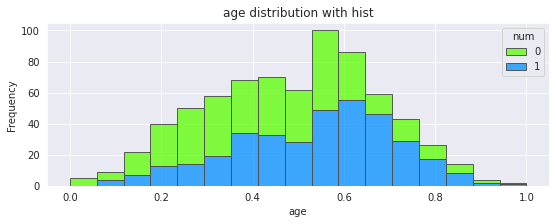

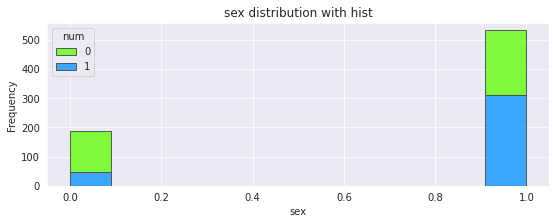

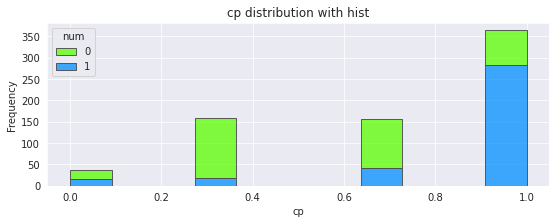

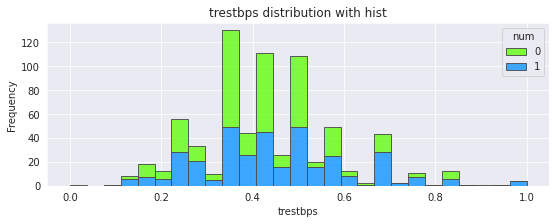

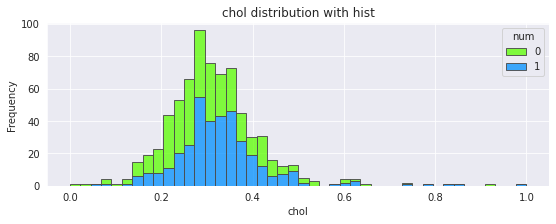

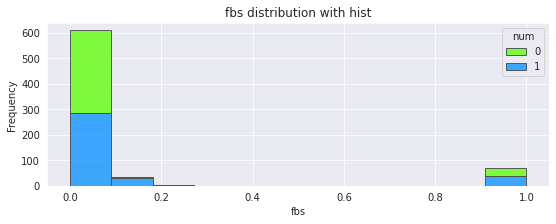

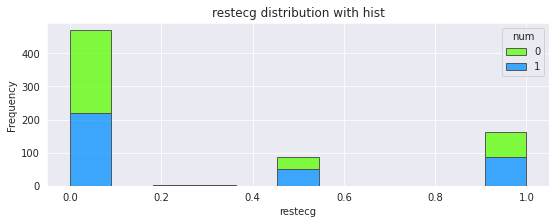

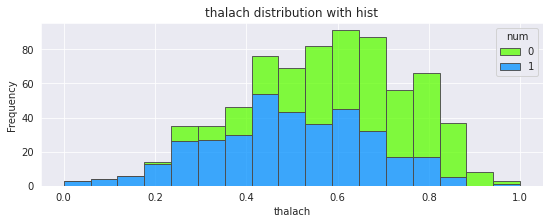

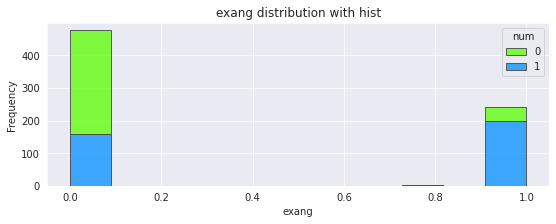

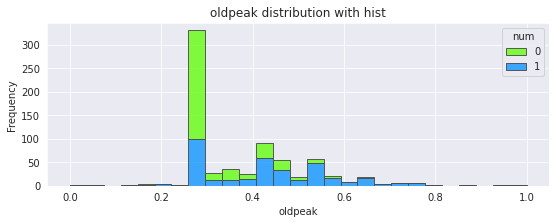

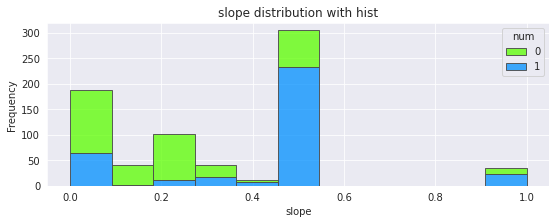

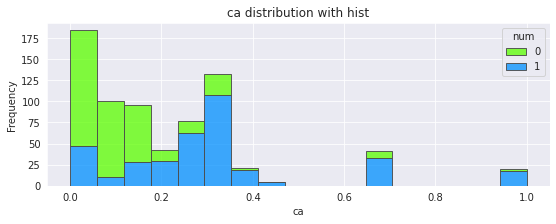

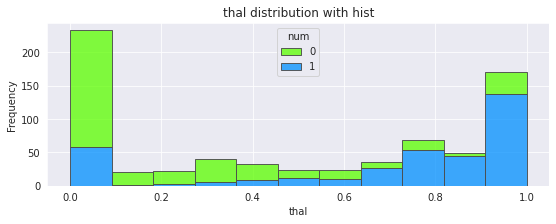

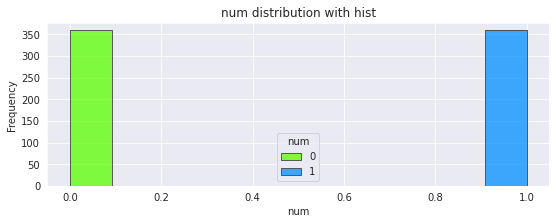

In [78]:
for n in ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]:
    plot_hist(n,Final_DF)

In [79]:
def plot_distribution(variable,df):
    dataset = df 
    sns.set_style('darkgrid')
    plt.figure(figsize = (9,3))
    #plt.hist(dataset[variable], bins = 50)
    sns.distplot(df[variable], rug=True, hist=True)
    #sns.distplot(Final_DF[Final_DF['num']==1][variable], rug=True, hist=True, label='1')
    #sns.distplot(Final_DF[Final_DF['num']==0][variable], rug=True, hist=True, label='0')
    plt.legend()
#plt.title('Density plot of age by sex');
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()



No handles with labels found to put in legend.


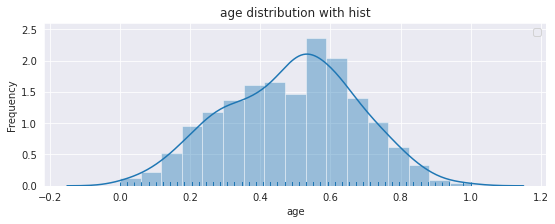

No handles with labels found to put in legend.


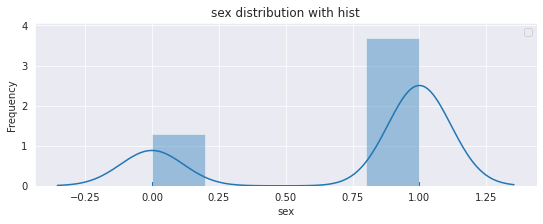

No handles with labels found to put in legend.


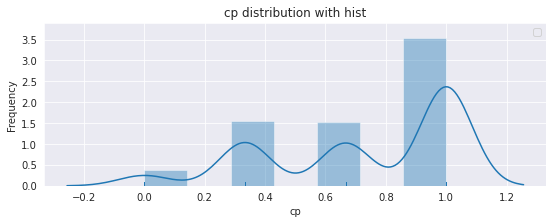

No handles with labels found to put in legend.


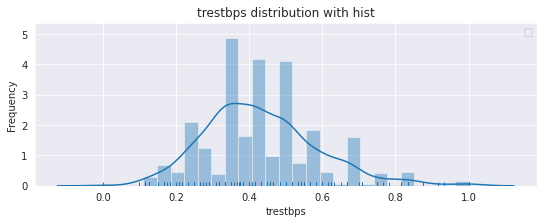

No handles with labels found to put in legend.


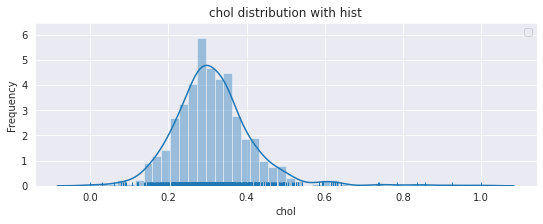

No handles with labels found to put in legend.


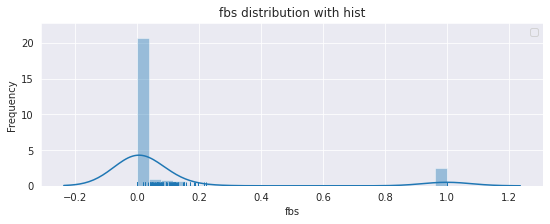

No handles with labels found to put in legend.


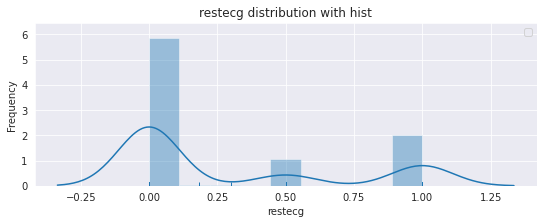

No handles with labels found to put in legend.


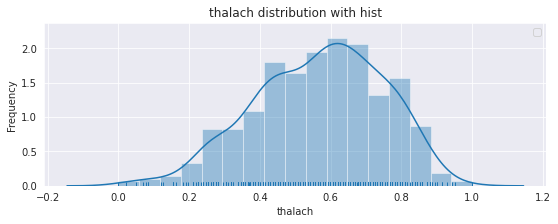

No handles with labels found to put in legend.


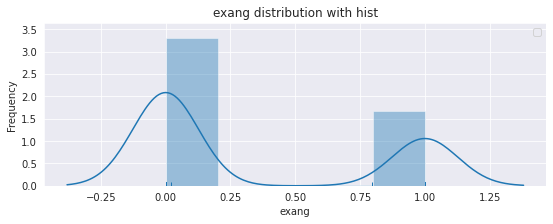

No handles with labels found to put in legend.


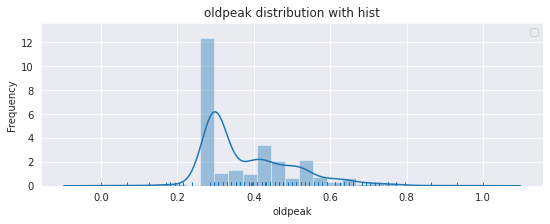

No handles with labels found to put in legend.


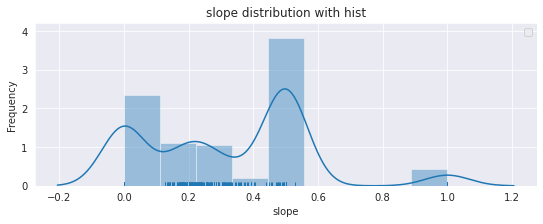

No handles with labels found to put in legend.


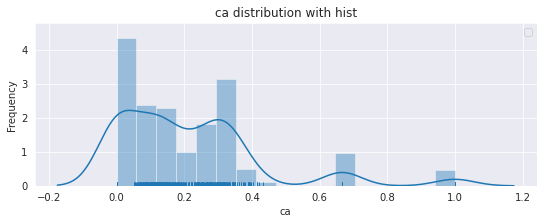

No handles with labels found to put in legend.


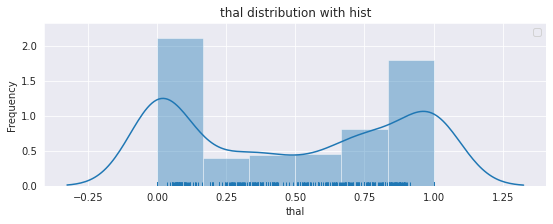

No handles with labels found to put in legend.


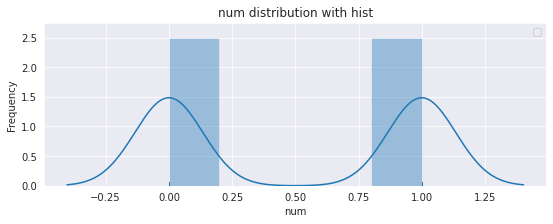

In [80]:
for n in ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]:
    plot_distribution(n,Final_DF)

### Data is not normal, but it is balanced from the num.Hence, before modeling we need to rescale or transform the dataset 

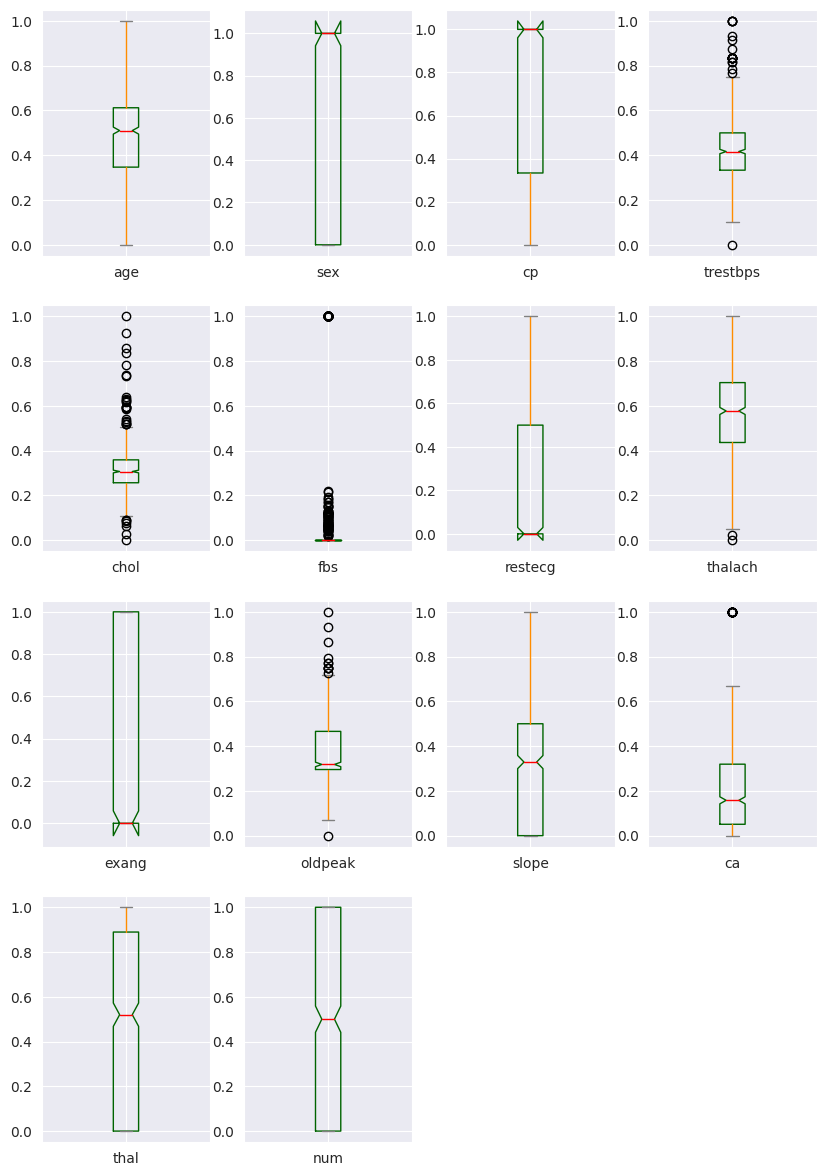

In [81]:
#Box plots
color1 = {
        "boxes": "DarkGreen",
        "whiskers": "DarkOrange",
        "medians": "red",
        "caps": "Gray",
        }
pyplot.rcParams.update({'figure.figsize':(10,15), 'figure.dpi':100})
ax = Final_DF.plot(kind='box',color=color1, subplots=True ,layout=(4,4),sharex=False, sharey=False , notch = True)
pyplot.xticks(fontsize = 16);
pyplot.yticks(fontsize = 4);
pyplot.show()
def boxplot_Matrix(labels, data):
    rows_list = []
    df = plt.boxplot(data,notch = True,labels = labels )
    for i in range(len(labels)):
        dict_Boxplot = {}
        dict_Boxplot['label'] = labels[i]
        dict_Boxplot['lower_whisker'] = df['whiskers'][i*2].get_ydata()[1]
        dict_Boxplot['lower_quartile'] = df['boxes'][i].get_ydata()[1]
        dict_Boxplot['median'] = df['medians'][i].get_ydata()[1]
        dict_Boxplot['upper_quartile'] = df['boxes'][i].get_ydata()[2]
        dict_Boxplot['upper_whisker'] = df['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict_Boxplot)

    return pd.DataFrame(rows_list)


### **Multimondal Data visualization**

In [82]:
#scatter plot matrix
#orange--- num=1, blue----num=0
plt.figure(figsize=(60,60))
sns.set_style('darkgrid')
sns.pairplot(Final_DF, hue='num')

Output hidden; open in https://colab.research.google.com to view.

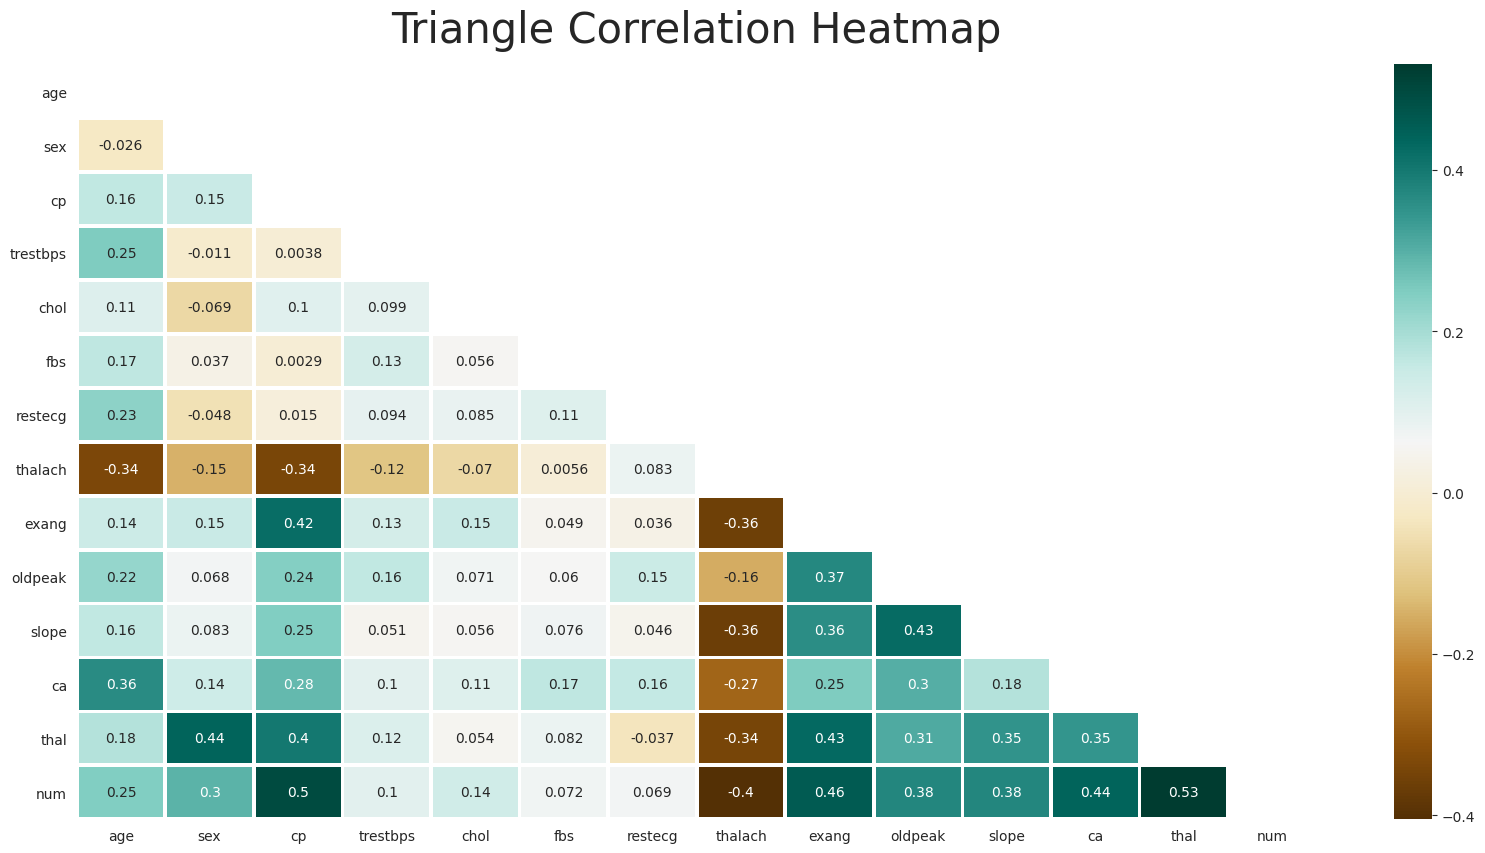

In [83]:
#correlation matrix
plt.figure(figsize=(20, 10))
sns.set_style('white')
mask = np.triu(np.ones_like(Final_DF.corr(), dtype=np.bool))
heatmap = sns.heatmap(Final_DF.corr(), mask=mask,annot=True, cmap='BrBG', linewidths = 2)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':30}, pad=16);

**Baseline Model**

In [84]:
def Print_Metrics(best_model,y_test,X_test,y_predict_test,X_train,y_train,modelName):
    print('\nModel performance on the test data set:')

    # print('Train Accuracy.......', accuracy_score(y_train, best_model.predict(X_train)))
    # print('Validate Accuracy....', accuracy_score(y_valid, best_model.predict(X_valid)))

    # y_predict_test  = best_model.predict(X_test)
    mse             = metrics.mean_squared_error(y_test, y_predict_test)
    logloss_test    = metrics.log_loss(y_test, y_predict_test)
    #accuracy_train = best_model.score(X_train, y_train)
    accuracy_test   = metrics.accuracy_score(y_test, y_predict_test)
    #accuracy_test2  = best_model.score(X_test, y_test)
    F1_test         = metrics.f1_score(y_test, y_predict_test)
    precision_test  = precision_score(y_test, y_predict_test, average='binary')
    precision_test2 = metrics.precision_score(y_test, y_predict_test)
    recall_test     = recall_score(y_test, y_predict_test, average='binary')
    auc_test        = metrics.roc_auc_score(y_test, y_predict_test)
    r2_test         = metrics.r2_score(y_test, y_predict_test)
   
    #test_auc       = h2o.get_model("best_rf").model_performance(test_data=test).auc()
    #print('Best model performance based on auc: ', test_auc)
    
    header = ["Metric", "Test"]
    table  = [
               ["logloss",   logloss_test],
              # ["Train accuracy", accuracy_train],
               ["Test accuracy",  accuracy_test],
               ["precision", precision_test],
               ["F1",        F1_test],
               ["r2",        r2_test],
               ["AUC",       auc_test]
             ]
    
    result = {
        "logloss" : logloss_test,
        #"Train accuracy": accuracy_train,
        "Test accuracy":accuracy_test,
        "precision": precision_test,
        "F1":F1_test,
        "r2":r2_test,
        "AUC":auc_test
    }

    data = [[modelName, logloss_test,accuracy_test,precision_test,F1_test,r2_test,auc_test]]
    df_result = pd.DataFrame(data, columns = ['ModelName', 'logloss','Test accuracy','precision', 'F1', 'r2', 'AUC'])
    print(tabulate(table, header, tablefmt="fancy_grid"))
    return df_result

In [85]:
def evaluate(model, X_train,y_train, X_test, y_test):
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
    roc_auc = auc(false_positive_rate, true_positive_rate)
   
    plt.figure()
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(false_positive_rate, true_positive_rate, color='darkorange', label='Random Forest')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve (area = %0.2f)' % roc_auc)
    plt.legend(loc='best')
    plt.show()
    
    return roc_auc

In [86]:
def Confusion_Matrix(y_test, y_pred):
    print("Confusion Matrix : ",metrics.confusion_matrix(y_test, y_pred))
    clf_confusion = metrics.confusion_matrix(y_test, y_pred)
    #[row, column]
    TP = clf_confusion[1, 1]
    TN = clf_confusion[0, 0]
    FP = clf_confusion[0, 1]
    FN = clf_confusion[1, 0]

    print("Classification Accuracy : ",(TP + TN) / float(TP + TN + FP + FN))
    print("classification_error : ",(FP + FN) / float(TP + TN + FP + FN))
    print("sensitivity : ",TP / float(FN + TP))
    print("specificity : ",TN / (TN + FP))
    print("false_positive_rate : ",FP / float(TN + FP))
    print("precision : ",TP / float(TP + FP))

In [87]:
def imp_feature(model):
    X_features = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]
    feature_imp = pd.Series(model.feature_importances_,index=X_features).sort_values(ascending=False)

    sns.barplot(x=feature_imp, y=feature_imp.index)
    # Add labels to your graph
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.legend()
    plt.show()

In [88]:
from sklearn.model_selection import train_test_split
y=Final_DF['num'] 
X=Final_DF[["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold

from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
from tabulate import tabulate

from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier

===========================Logistic Regression : LR================================

Model performance on the test data set:
╒═══════════════╤══════════╕
│ Metric        │     Test │
╞═══════════════╪══════════╡
│ logloss       │ 6.23623  │
├───────────────┼──────────┤
│ Test accuracy │ 0.819444 │
├───────────────┼──────────┤
│ precision     │ 0.838095 │
├───────────────┼──────────┤
│ F1            │ 0.818605 │
├───────────────┼──────────┤
│ r2            │ 0.27753  │
├───────────────┼──────────┤
│ AUC           │ 0.819811 │
╘═══════════════╧══════════╛



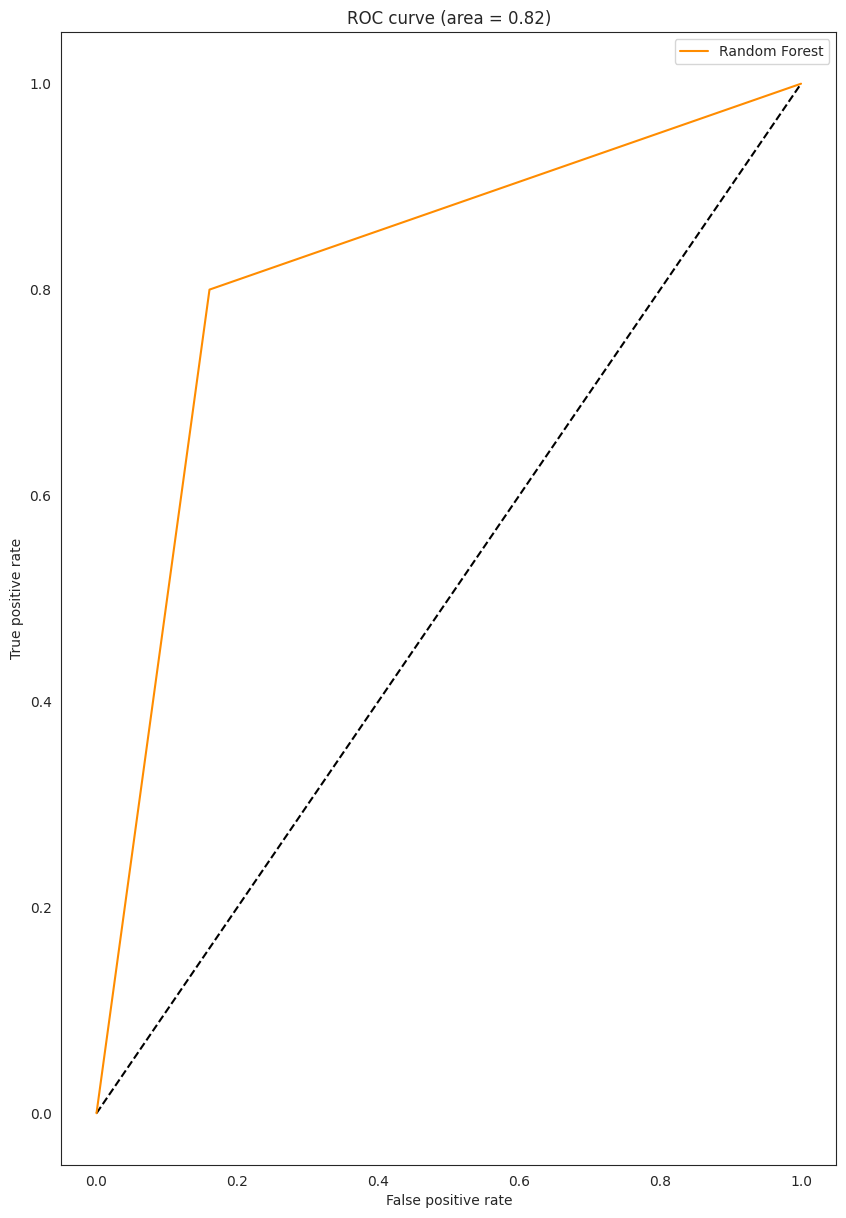

ROC for base model : Logistic Regression : LR : 0.819811320754717

Confusion Matrix : 
Confusion Matrix :  [[89 17]
 [22 88]]
Classification Accuracy :  0.8194444444444444
classification_error :  0.18055555555555555
sensitivity :  0.8
specificity :  0.839622641509434
false_positive_rate :  0.16037735849056603
precision :  0.8380952380952381

Imp Features : 

===========================Linear Discriminant Analysis : LDA ================================

Model performance on the test data set:
╒═══════════════╤══════════╕
│ Metric        │     Test │
╞═══════════════╪══════════╡
│ logloss       │ 5.59661  │
├───────────────┼──────────┤
│ Test accuracy │ 0.837963 │
├───────────────┼──────────┤
│ precision     │ 0.864078 │
├───────────────┼──────────┤
│ F1            │ 0.835681 │
├───────────────┼──────────┤
│ r2            │ 0.35163  │
├───────────────┼──────────┤
│ AUC           │ 0.838508 │
╘═══════════════╧══════════╛



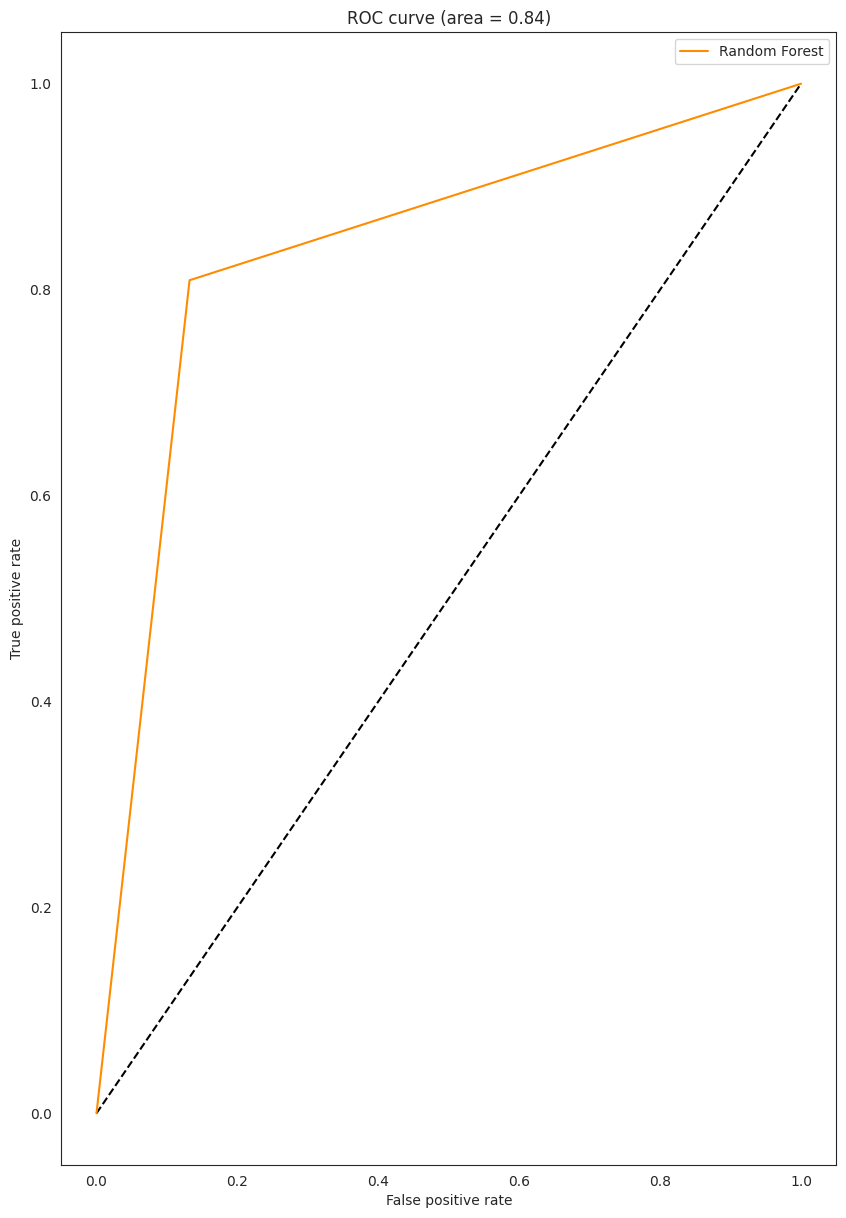

ROC for base model : Linear Discriminant Analysis : LDA  : 0.838507718696398

Confusion Matrix : 
Confusion Matrix :  [[92 14]
 [21 89]]
Classification Accuracy :  0.8379629629629629
classification_error :  0.16203703703703703
sensitivity :  0.8090909090909091
specificity :  0.8679245283018868
false_positive_rate :  0.1320754716981132
precision :  0.8640776699029126

Imp Features : 

===========================KNN================================

Model performance on the test data set:
╒═══════════════╤══════════╕
│ Metric        │     Test │
╞═══════════════╪══════════╡
│ logloss       │ 6.23623  │
├───────────────┼──────────┤
│ Test accuracy │ 0.819444 │
├───────────────┼──────────┤
│ precision     │ 0.838095 │
├───────────────┼──────────┤
│ F1            │ 0.818605 │
├───────────────┼──────────┤
│ r2            │ 0.27753  │
├───────────────┼──────────┤
│ AUC           │ 0.819811 │
╘═══════════════╧══════════╛



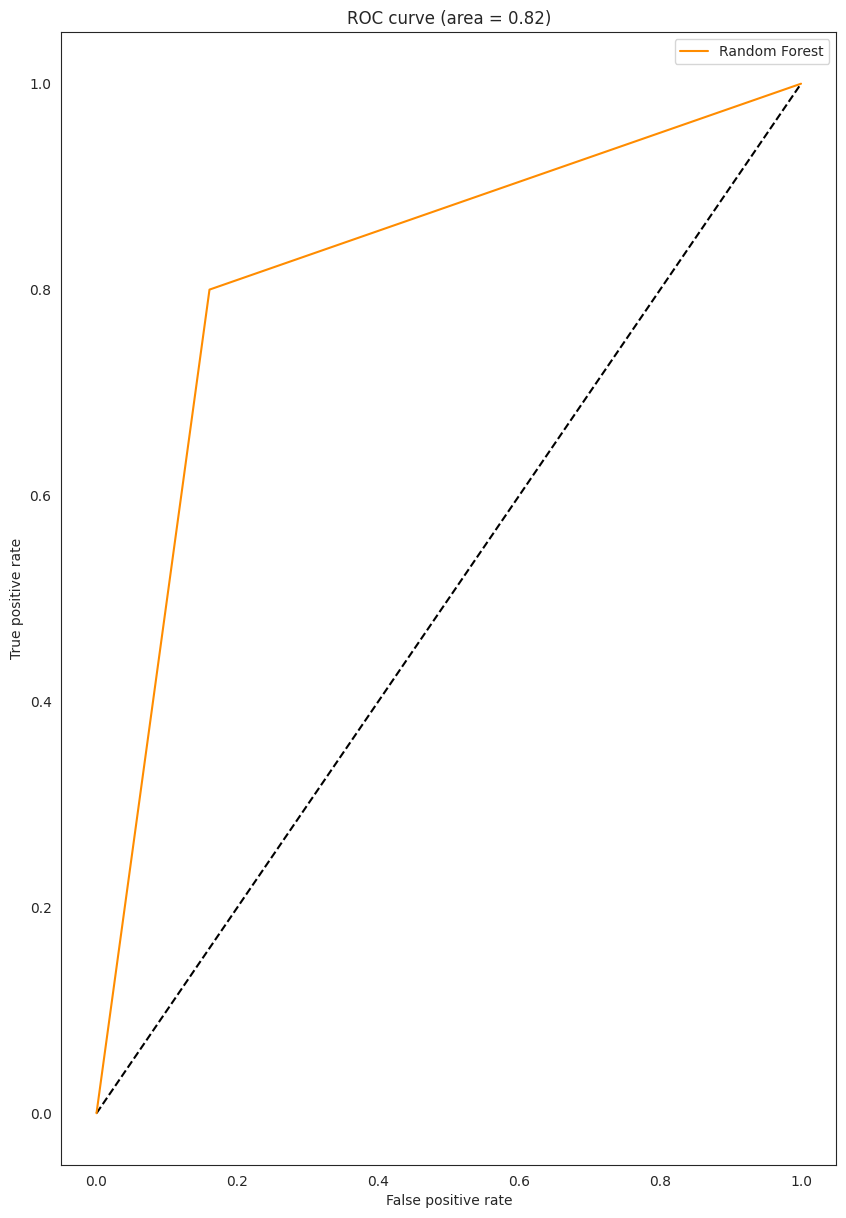

ROC for base model : KNN : 0.819811320754717

Confusion Matrix : 
Confusion Matrix :  [[89 17]
 [22 88]]
Classification Accuracy :  0.8194444444444444
classification_error :  0.18055555555555555
sensitivity :  0.8
specificity :  0.839622641509434
false_positive_rate :  0.16037735849056603
precision :  0.8380952380952381

Imp Features : 

===========================Decision Tree Classifier================================

Model performance on the test data set:
╒═══════════════╤══════════╕
│ Metric        │     Test │
╞═══════════════╪══════════╡
│ logloss       │ 6.71594  │
├───────────────┼──────────┤
│ Test accuracy │ 0.805556 │
├───────────────┼──────────┤
│ precision     │ 0.826923 │
├───────────────┼──────────┤
│ F1            │ 0.803738 │
├───────────────┼──────────┤
│ r2            │ 0.221955 │
├───────────────┼──────────┤
│ AUC           │ 0.806003 │
╘═══════════════╧══════════╛



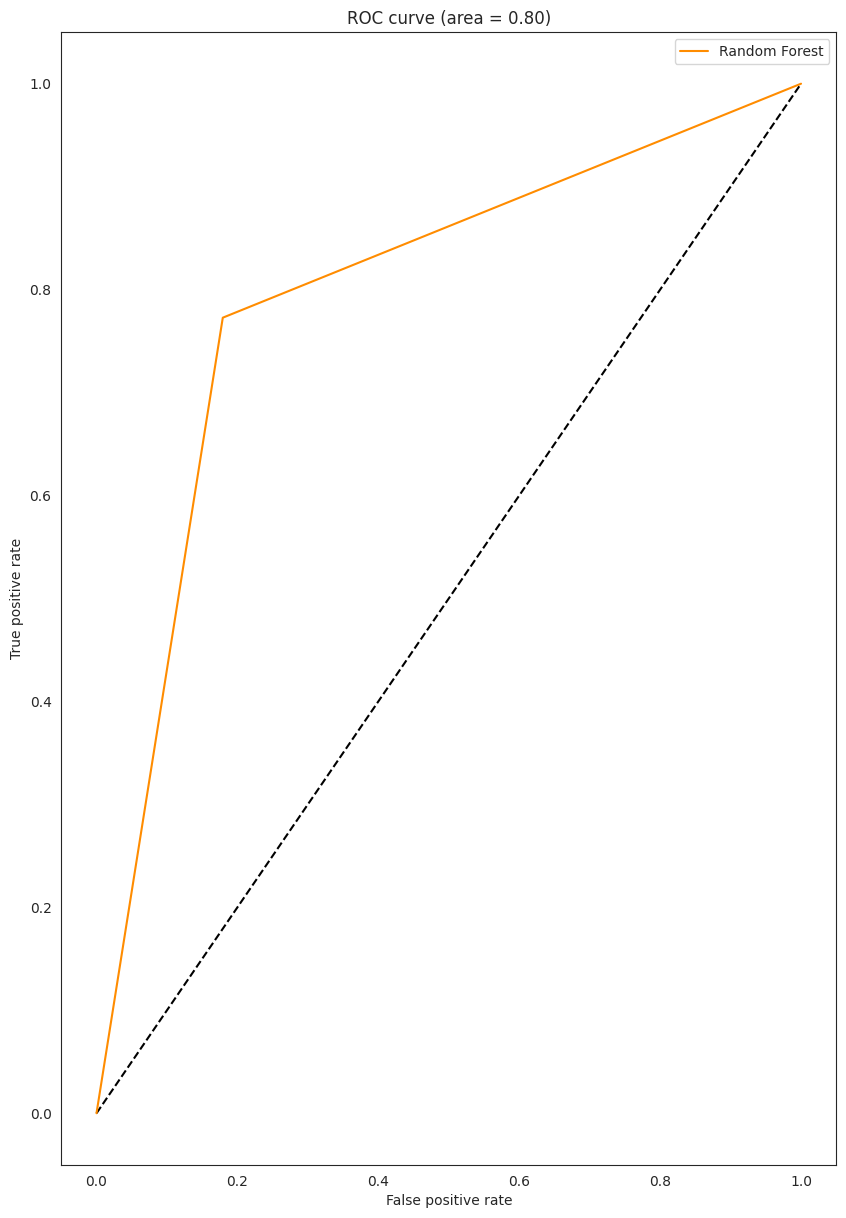

No handles with labels found to put in legend.


ROC for base model : Decision Tree Classifier : 0.7967409948542024

Confusion Matrix : 
Confusion Matrix :  [[88 18]
 [24 86]]
Classification Accuracy :  0.8055555555555556
classification_error :  0.19444444444444445
sensitivity :  0.7818181818181819
specificity :  0.8301886792452831
false_positive_rate :  0.16981132075471697
precision :  0.8269230769230769

Imp Features : 


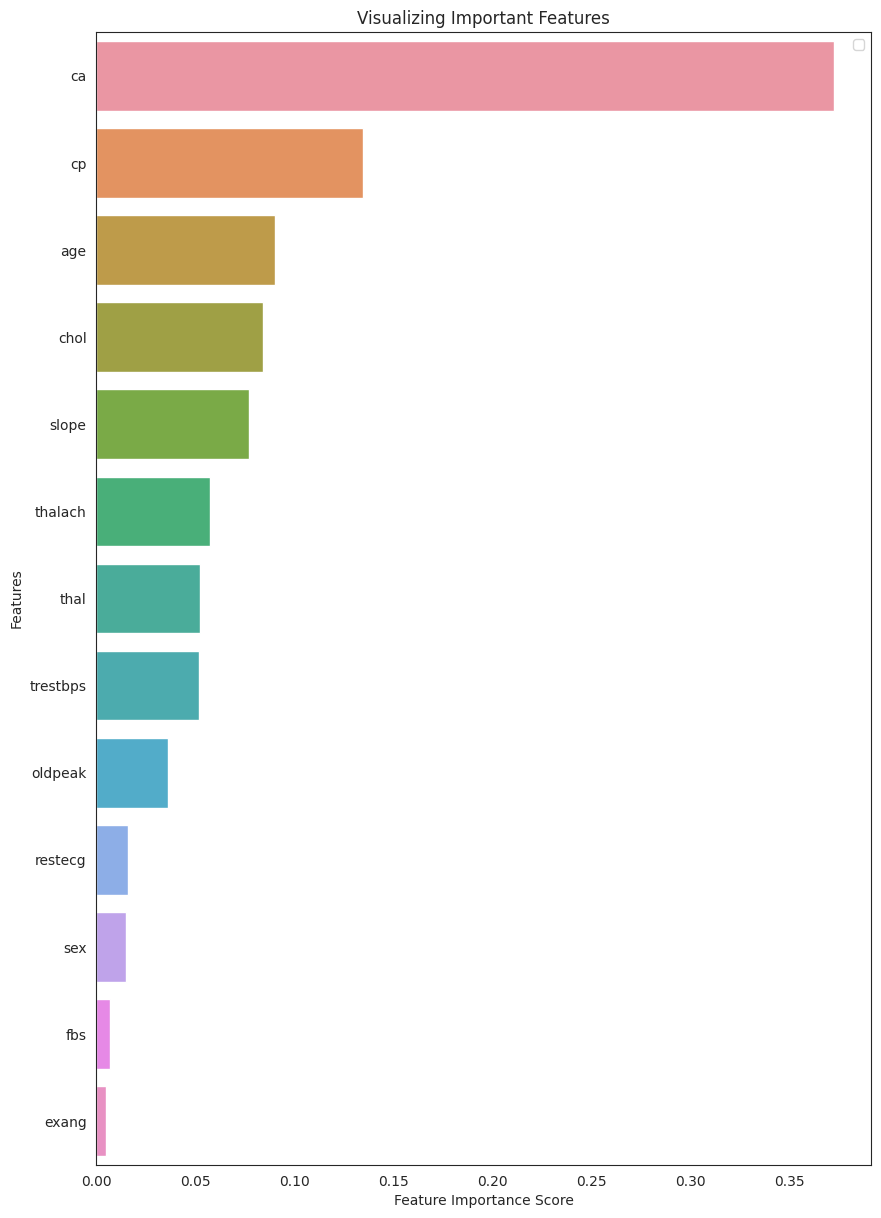

===========================GaussianNB : NB================================

Model performance on the test data set:
╒═══════════════╤══════════╕
│ Metric        │     Test │
╞═══════════════╪══════════╡
│ logloss       │ 6.23623  │
├───────────────┼──────────┤
│ Test accuracy │ 0.819444 │
├───────────────┼──────────┤
│ precision     │ 0.84466  │
├───────────────┼──────────┤
│ F1            │ 0.816901 │
├───────────────┼──────────┤
│ r2            │ 0.27753  │
├───────────────┼──────────┤
│ AUC           │ 0.819983 │
╘═══════════════╧══════════╛



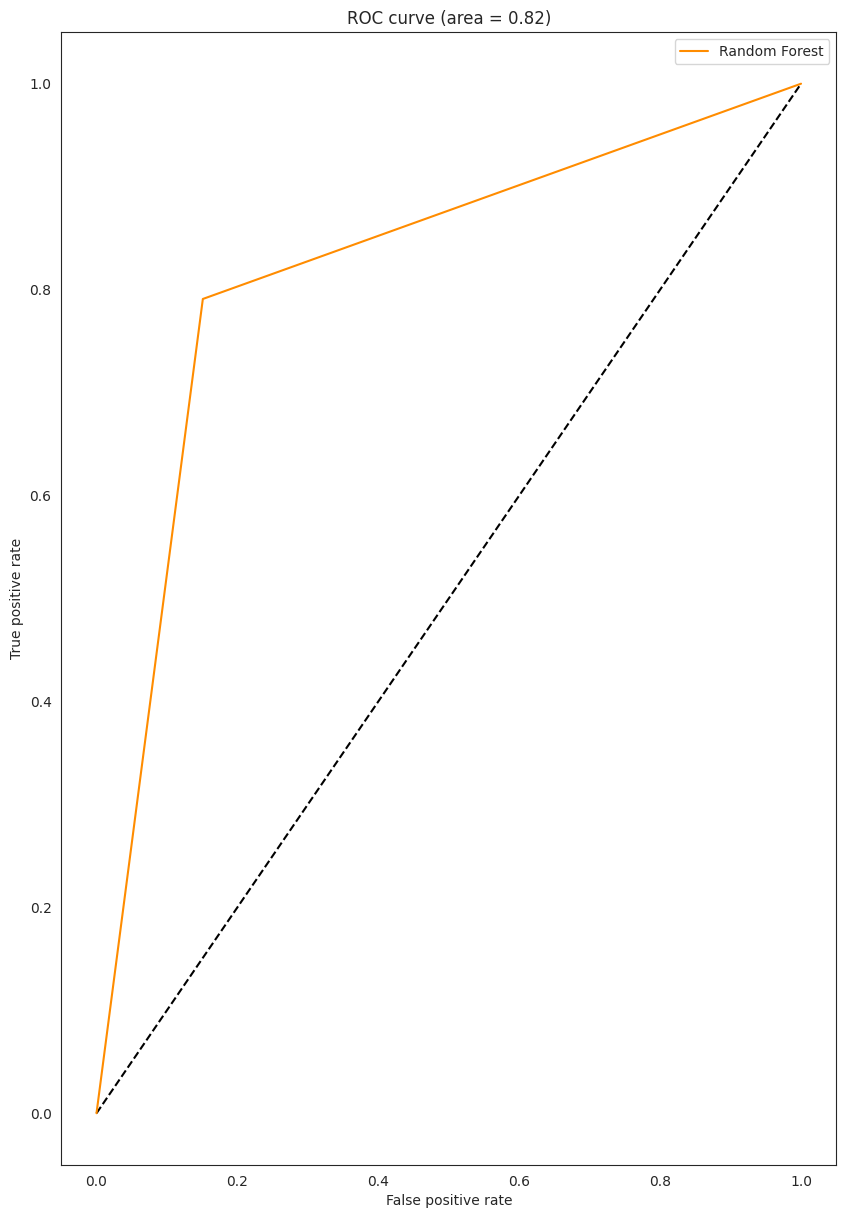

ROC for base model : GaussianNB : NB : 0.819982847341338

Confusion Matrix : 
Confusion Matrix :  [[90 16]
 [23 87]]
Classification Accuracy :  0.8194444444444444
classification_error :  0.18055555555555555
sensitivity :  0.7909090909090909
specificity :  0.8490566037735849
false_positive_rate :  0.1509433962264151
precision :  0.8446601941747572

Imp Features : 

===========================SVM================================

Model performance on the test data set:
╒═══════════════╤══════════╕
│ Metric        │     Test │
╞═══════════════╪══════════╡
│ logloss       │ 6.71594  │
├───────────────┼──────────┤
│ Test accuracy │ 0.805556 │
├───────────────┼──────────┤
│ precision     │ 0.820755 │
├───────────────┼──────────┤
│ F1            │ 0.805556 │
├───────────────┼──────────┤
│ r2            │ 0.221955 │
├───────────────┼──────────┤
│ AUC           │ 0.805832 │
╘═══════════════╧══════════╛



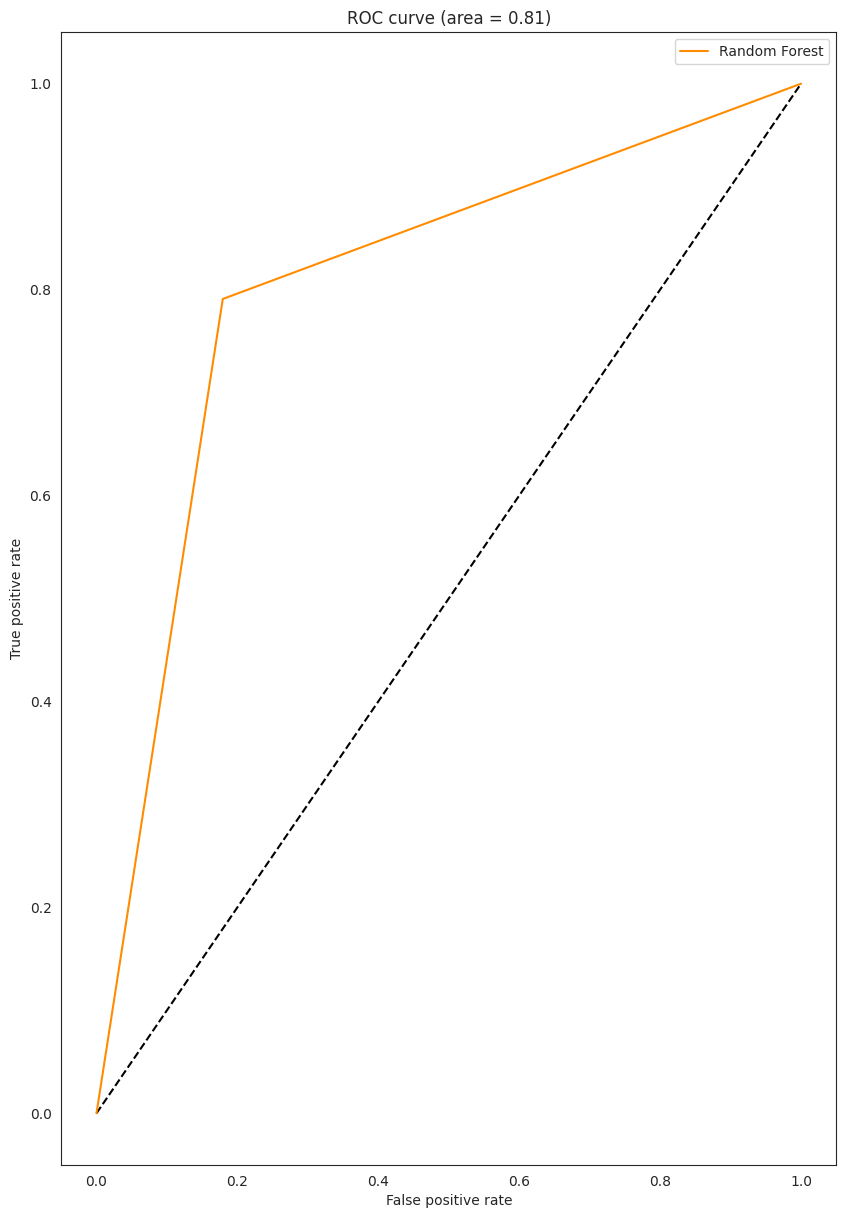

ROC for base model : SVM : 0.8058319039451116

Confusion Matrix : 
Confusion Matrix :  [[87 19]
 [23 87]]
Classification Accuracy :  0.8055555555555556
classification_error :  0.19444444444444445
sensitivity :  0.7909090909090909
specificity :  0.8207547169811321
false_positive_rate :  0.1792452830188679
precision :  0.8207547169811321

Imp Features : 

===========================Random Forest Classifier : RFC================================

Model performance on the test data set:
╒═══════════════╤══════════╕
│ Metric        │     Test │
╞═══════════════╪══════════╡
│ logloss       │ 5.75653  │
├───────────────┼──────────┤
│ Test accuracy │ 0.833333 │
├───────────────┼──────────┤
│ precision     │ 0.842593 │
├───────────────┼──────────┤
│ F1            │ 0.834862 │
├───────────────┼──────────┤
│ r2            │ 0.333105 │
├───────────────┼──────────┤
│ AUC           │ 0.833448 │
╘═══════════════╧══════════╛



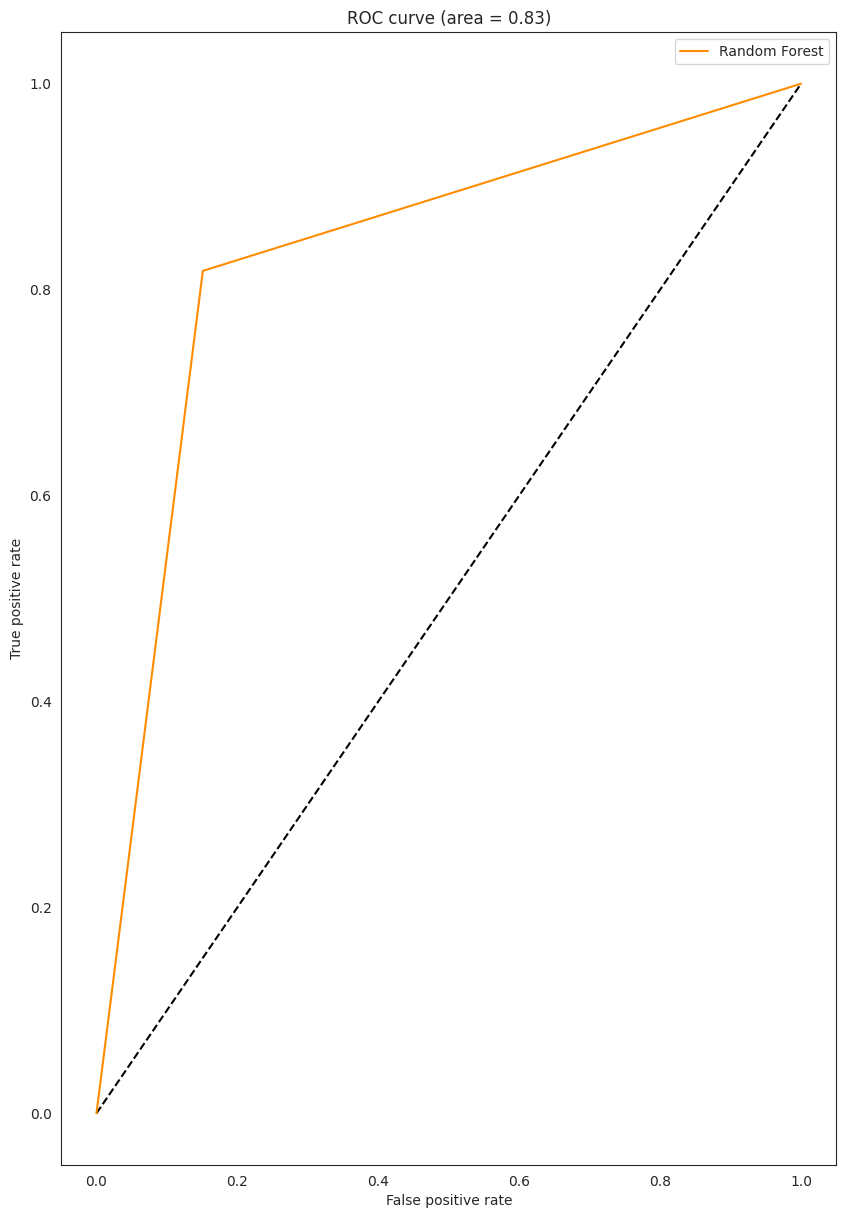

No handles with labels found to put in legend.


ROC for base model : Random Forest Classifier : RFC : 0.8336192109777016

Confusion Matrix : 
Confusion Matrix :  [[89 17]
 [19 91]]
Classification Accuracy :  0.8333333333333334
classification_error :  0.16666666666666666
sensitivity :  0.8272727272727273
specificity :  0.839622641509434
false_positive_rate :  0.16037735849056603
precision :  0.8425925925925926

Imp Features : 


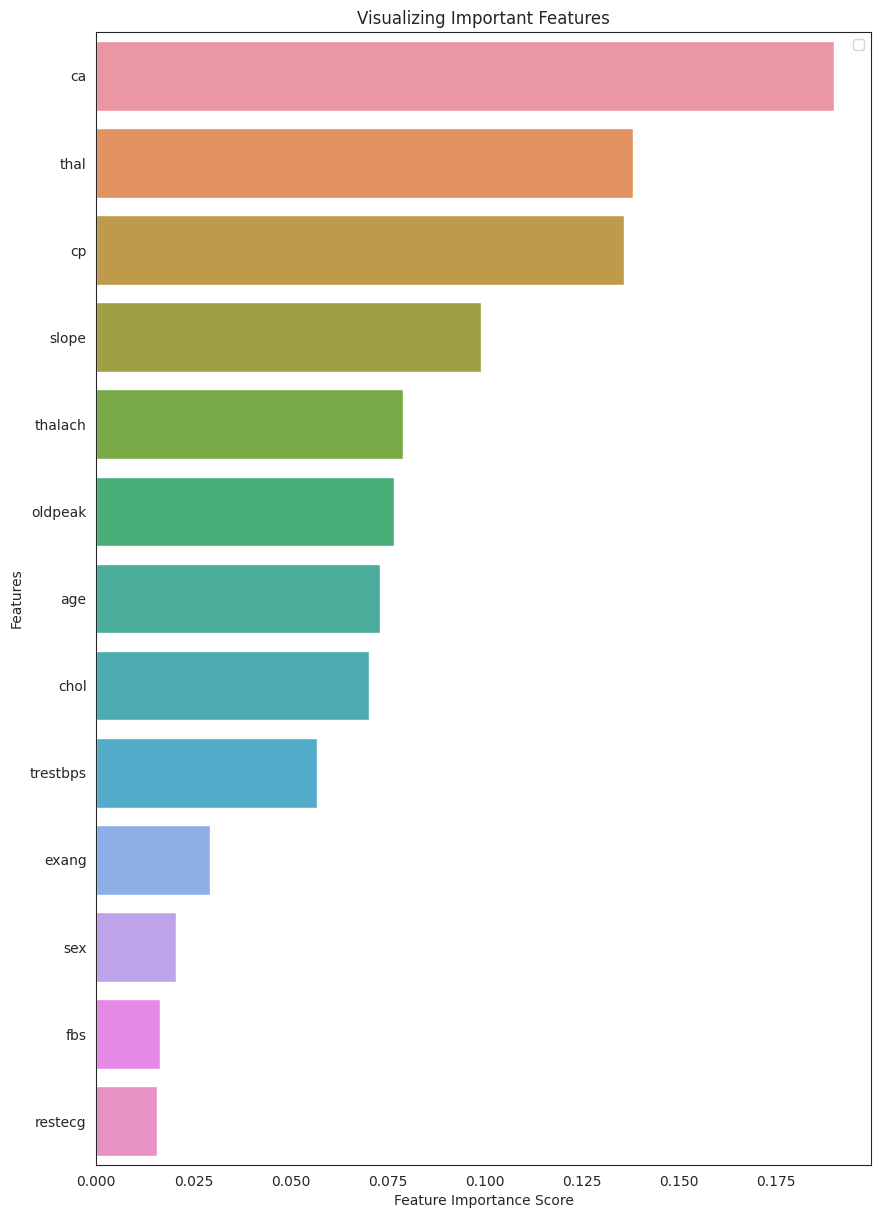

===========================Ada Boosting================================

Model performance on the test data set:
╒═══════════════╤══════════╕
│ Metric        │     Test │
╞═══════════════╪══════════╡
│ logloss       │ 5.91642  │
├───────────────┼──────────┤
│ Test accuracy │ 0.828704 │
├───────────────┼──────────┤
│ precision     │ 0.854369 │
├───────────────┼──────────┤
│ F1            │ 0.826291 │
├───────────────┼──────────┤
│ r2            │ 0.31458  │
├───────────────┼──────────┤
│ AUC           │ 0.829245 │
╘═══════════════╧══════════╛



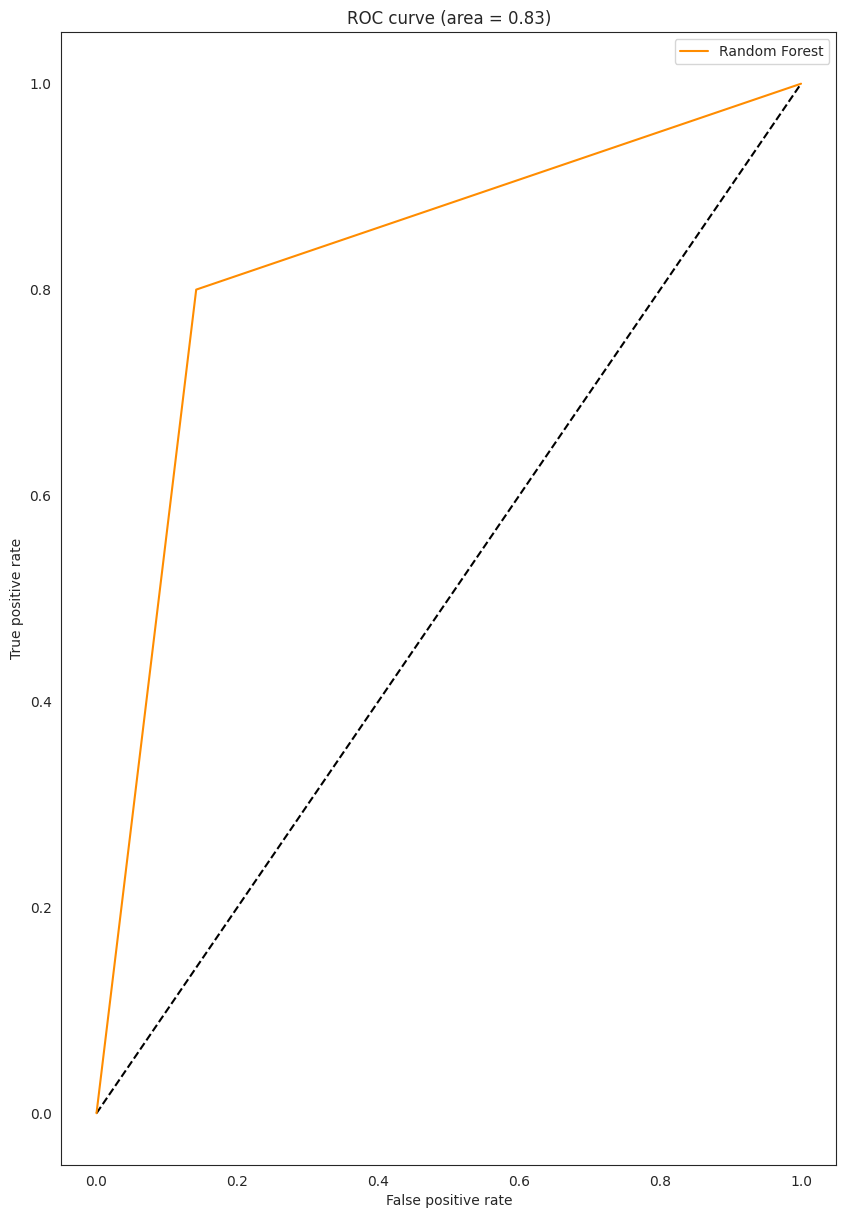

No handles with labels found to put in legend.


ROC for base model : Ada Boosting : 0.8292452830188679

Confusion Matrix : 
Confusion Matrix :  [[91 15]
 [22 88]]
Classification Accuracy :  0.8287037037037037
classification_error :  0.1712962962962963
sensitivity :  0.8
specificity :  0.8584905660377359
false_positive_rate :  0.14150943396226415
precision :  0.8543689320388349

Imp Features : 


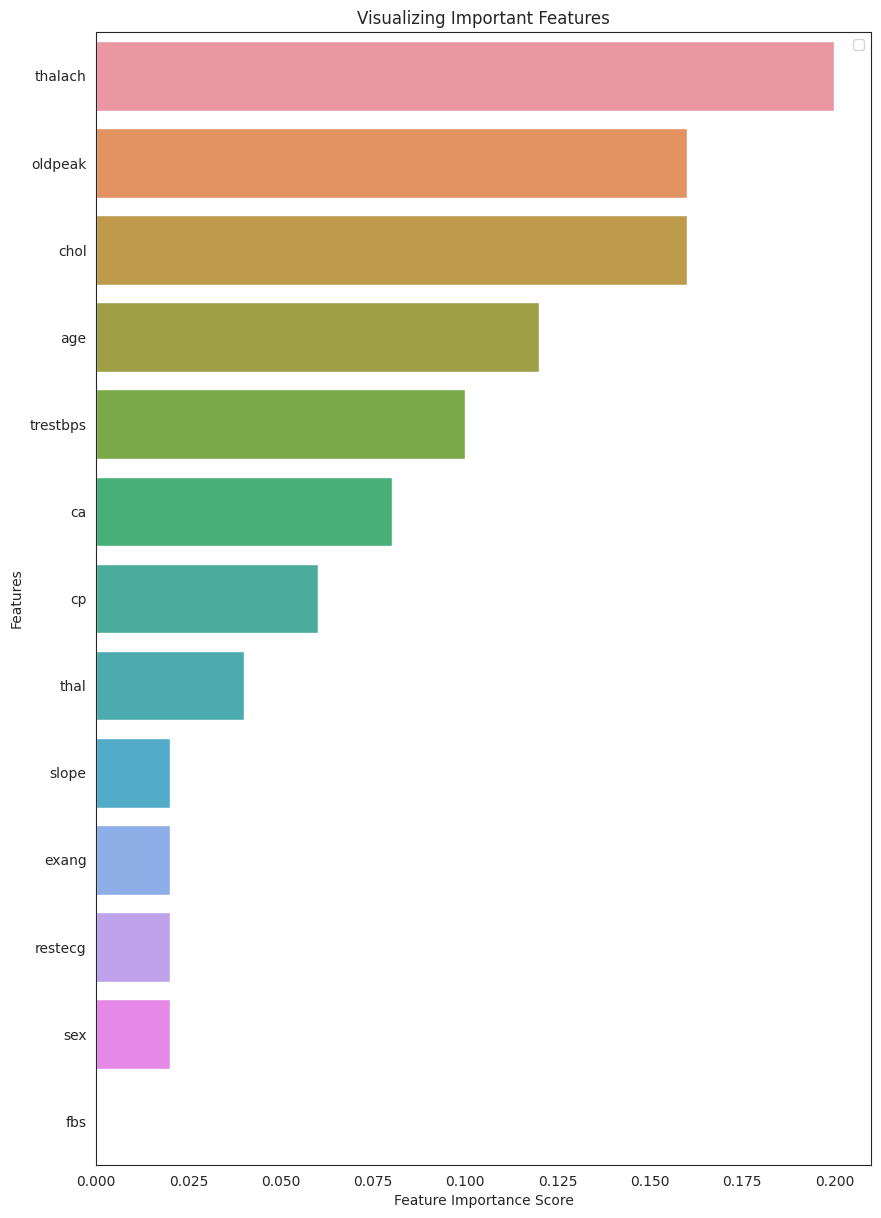

===========================XG Boosting================================

Model performance on the test data set:
╒═══════════════╤══════════╕
│ Metric        │     Test │
╞═══════════════╪══════════╡
│ logloss       │ 6.39613  │
├───────────────┼──────────┤
│ Test accuracy │ 0.814815 │
├───────────────┼──────────┤
│ precision     │ 0.843137 │
├───────────────┼──────────┤
│ F1            │ 0.811321 │
├───────────────┼──────────┤
│ r2            │ 0.259005 │
├───────────────┼──────────┤
│ AUC           │ 0.815437 │
╘═══════════════╧══════════╛



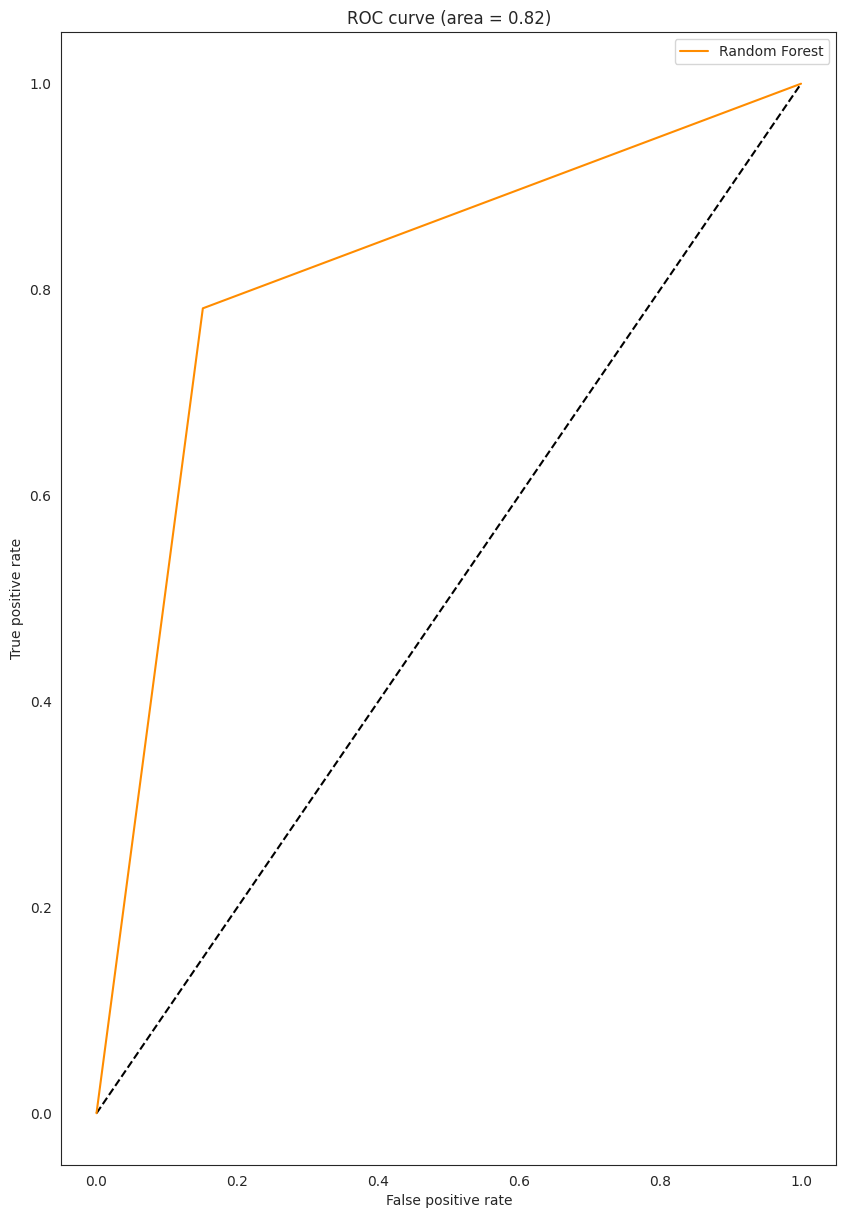

No handles with labels found to put in legend.


ROC for base model : XG Boosting : 0.8154373927958833

Confusion Matrix : 
Confusion Matrix :  [[90 16]
 [24 86]]
Classification Accuracy :  0.8148148148148148
classification_error :  0.18518518518518517
sensitivity :  0.7818181818181819
specificity :  0.8490566037735849
false_positive_rate :  0.1509433962264151
precision :  0.8431372549019608

Imp Features : 


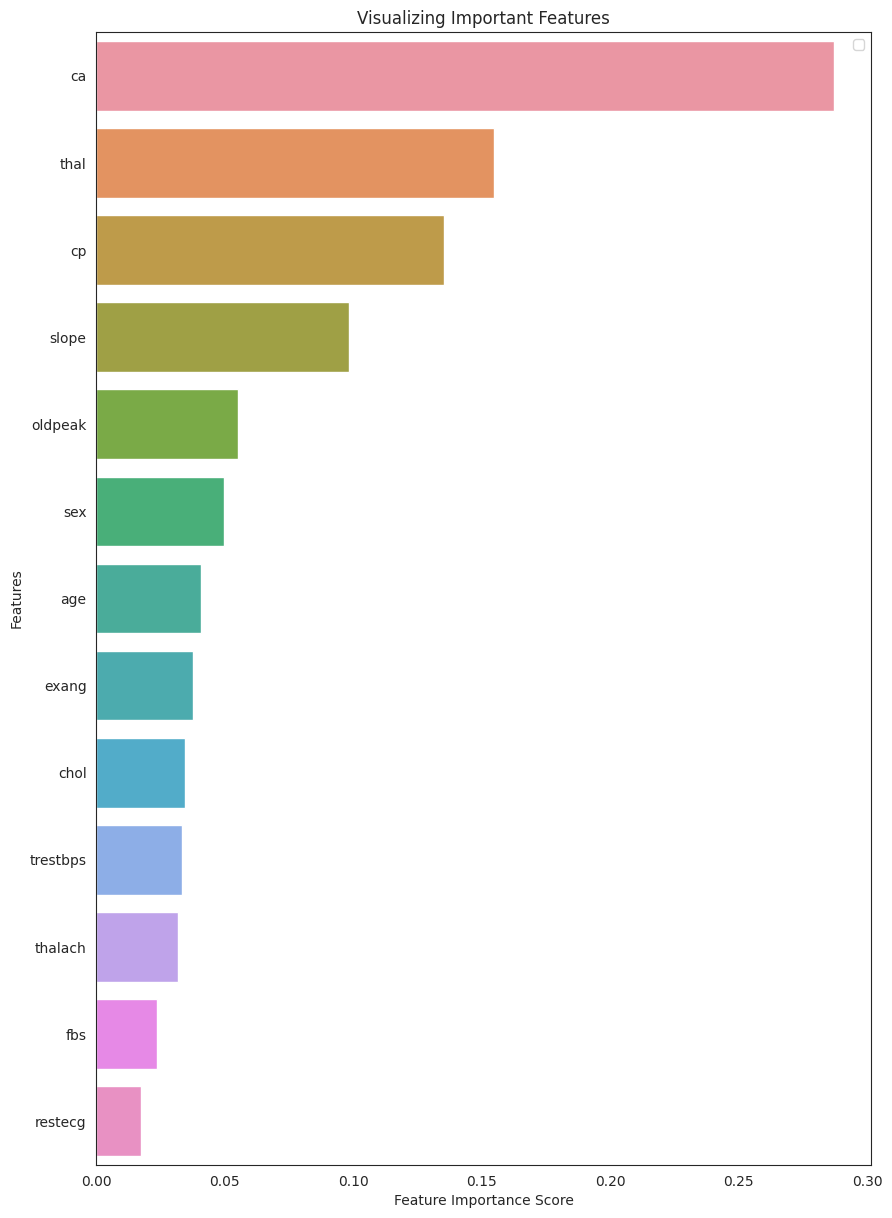

===========================bagging Classifier================================

Model performance on the test data set:
╒═══════════════╤══════════╕
│ Metric        │     Test │
╞═══════════════╪══════════╡
│ logloss       │ 5.59661  │
├───────────────┼──────────┤
│ Test accuracy │ 0.837963 │
├───────────────┼──────────┤
│ precision     │ 0.871287 │
├───────────────┼──────────┤
│ F1            │ 0.834123 │
├───────────────┼──────────┤
│ r2            │ 0.35163  │
├───────────────┼──────────┤
│ AUC           │ 0.838679 │
╘═══════════════╧══════════╛



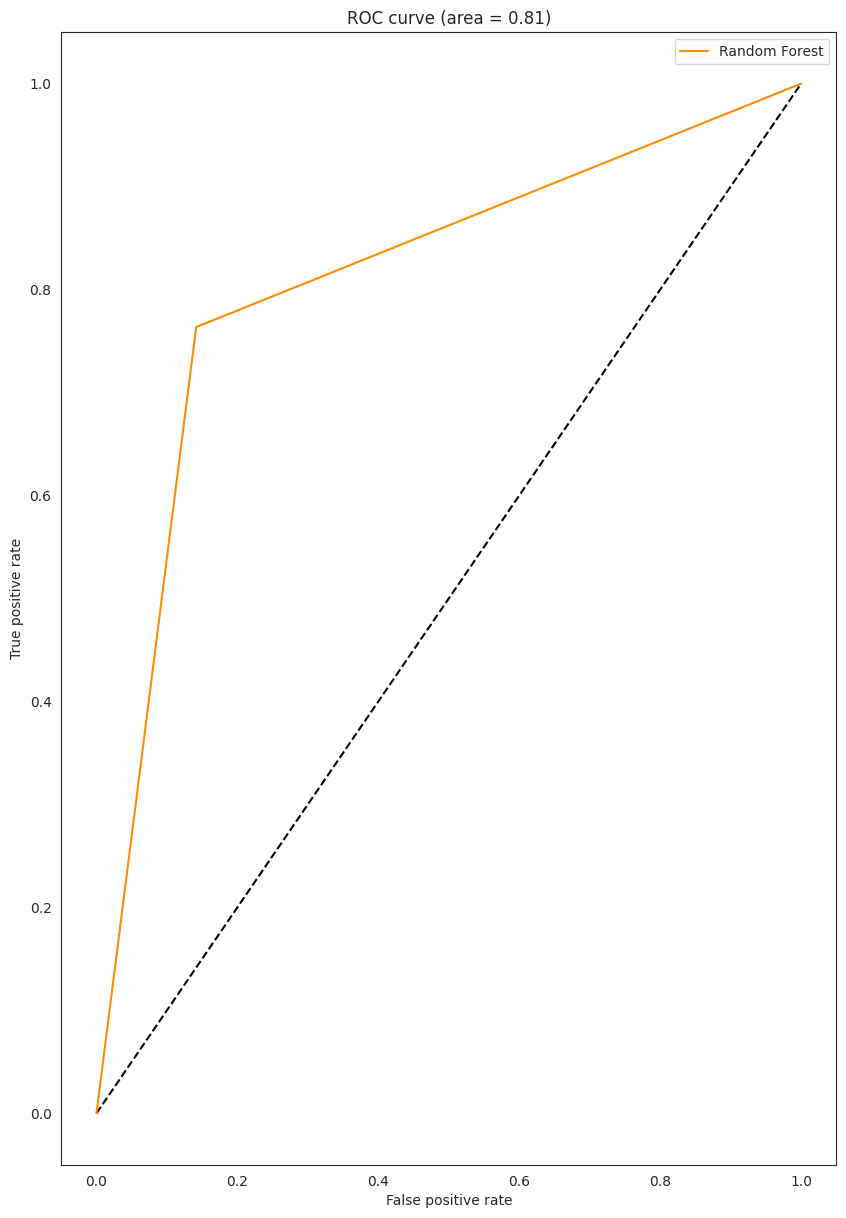

ROC for base model : bagging Classifier : 0.8110634648370498

Confusion Matrix : 
Confusion Matrix :  [[93 13]
 [22 88]]
Classification Accuracy :  0.8379629629629629
classification_error :  0.16203703703703703
sensitivity :  0.8
specificity :  0.8773584905660378
false_positive_rate :  0.12264150943396226
precision :  0.8712871287128713

Imp Features : 



In [90]:
models=[]
models.append(('Logistic Regression : LR', LogisticRegression()))
models.append(('Linear Discriminant Analysis : LDA ', LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))
models.append(('GaussianNB : NB', GaussianNB()))
models.append(('SVM',SVC()))
models.append(('Random Forest Classifier : RFC',RandomForestClassifier()))
models.append(('Ada Boosting',AdaBoostClassifier()))
models.append(('XG Boosting',XGBClassifier()))
models.append(('bagging Classifier',BaggingClassifier()))

		    
appended_data = []

for name, model in models:
    print("==========================="+name+"================================")
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    Metrics = Print_Metrics(model,y_test,X_test,y_pred,X_train,y_train,name)
    appended_data.append(Metrics)
    print('')
    print('ROC for base model : '+name+ ' : ' + str(evaluate(model,X_train,y_train, X_test, y_test)))
    print('')
    print('Confusion Matrix : ')
    Confusion_Matrix(y_test, y_pred)
    print('')
    try:
      print('Imp Features : ')
      imp_feature(model)
    except:
      print('')

Result_Accuracy = pd.concat(appended_data)

In [91]:
Result_Accuracy.sort_values(by='Test accuracy', ascending=False)

,ModelName,logloss,Test accuracy,precision,F1,r2,AUC
0,Linear Discriminant Analysis : LDA,5.597,0.838,0.864,0.836,0.352,0.839
0,bagging Classifier,5.597,0.838,0.871,0.834,0.352,0.839
0,Random Forest Classifier : RFC,5.757,0.833,0.843,0.835,0.333,0.833
0,Ada Boosting,5.916,0.829,0.854,0.826,0.315,0.829
0,Logistic Regression : LR,6.236,0.819,0.838,0.819,0.278,0.820
0,KNN,6.236,0.819,0.838,0.819,0.278,0.820
0,GaussianNB : NB,6.236,0.819,0.845,0.817,0.278,0.820
0,XG Boosting,6.396,0.815,0.843,0.811,0.259,0.815
0,Decision Tree Classifier,6.716,0.806,0.827,0.804,0.222,0.806
0,SVM,6.716,0.806,0.821,0.806,0.222,0.806


###**Decision based on Visulization**
* standardize the dataset to reduce the effect of differing distribution 

* Feature selection: highly correlated(negatively/positively) attributes with num will be better predictors
* removing the outliers--keep it


In [92]:
# split the dataset for above conversion 80%-20%
from sklearn.model_selection import train_test_split

array=Final_DF.values
X=array[:,0:13]
Y=array[:,13]
seed=7
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=seed)


##---------------------------------Do not Enter--------------------------------

# **Evaluate the baseline algorithm**
Spot check  a number of different classification algorithms:

**Linear Algorithm:** Logistic Regression, LDA

**Non-linear algorithms** Classification and regression Tree (CART), Support vector machine , Gaussian Naive Bayes (NB), and K-Nearest Neighbors (KNN)



In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold


In [94]:
KNeighborsClassifier()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [95]:
num_folds=10
seed=7
scoring='accuracy'

In [112]:
from sklearn.ensemble import RandomForestClassifier
#Spot -check algorithm
models=[]
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM',SVC()))
models.append(('clf',RandomForestClassifier()))
models.append(('Ada',AdaBoostClassifier()))

results =[]
names= []
mean_acc=[]

for name, model in models:
  kfold=KFold(n_splits=num_folds,random_state=seed)
  cv_results= cross_val_score(model, X,Y,cv=kfold, scoring= 'accuracy')
  results.append(cv_results)
  mean_acc.append(cv_results.mean())
  names.append(name)
  msg= "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.792430 (0.073234)
LDA: 0.797985 (0.072957)
KNN: 0.774335 (0.066393)
CART: 0.653052 (0.095486)
NB: 0.817547 (0.060398)
SVM: 0.789652 (0.072141)
clf: 0.782825 (0.089424)
Ada: 0.741060 (0.082844)


In [113]:
mean_acc

[0.7924295774647887,
 0.7979851330203444,
 0.7743348982785603,
 0.6530516431924882,
 0.8175469483568074,
 0.7896517996870112,
 0.7828247261345853,
 0.7410602503912364]

all the results have low variance and NB, SVM, and LR performing well 

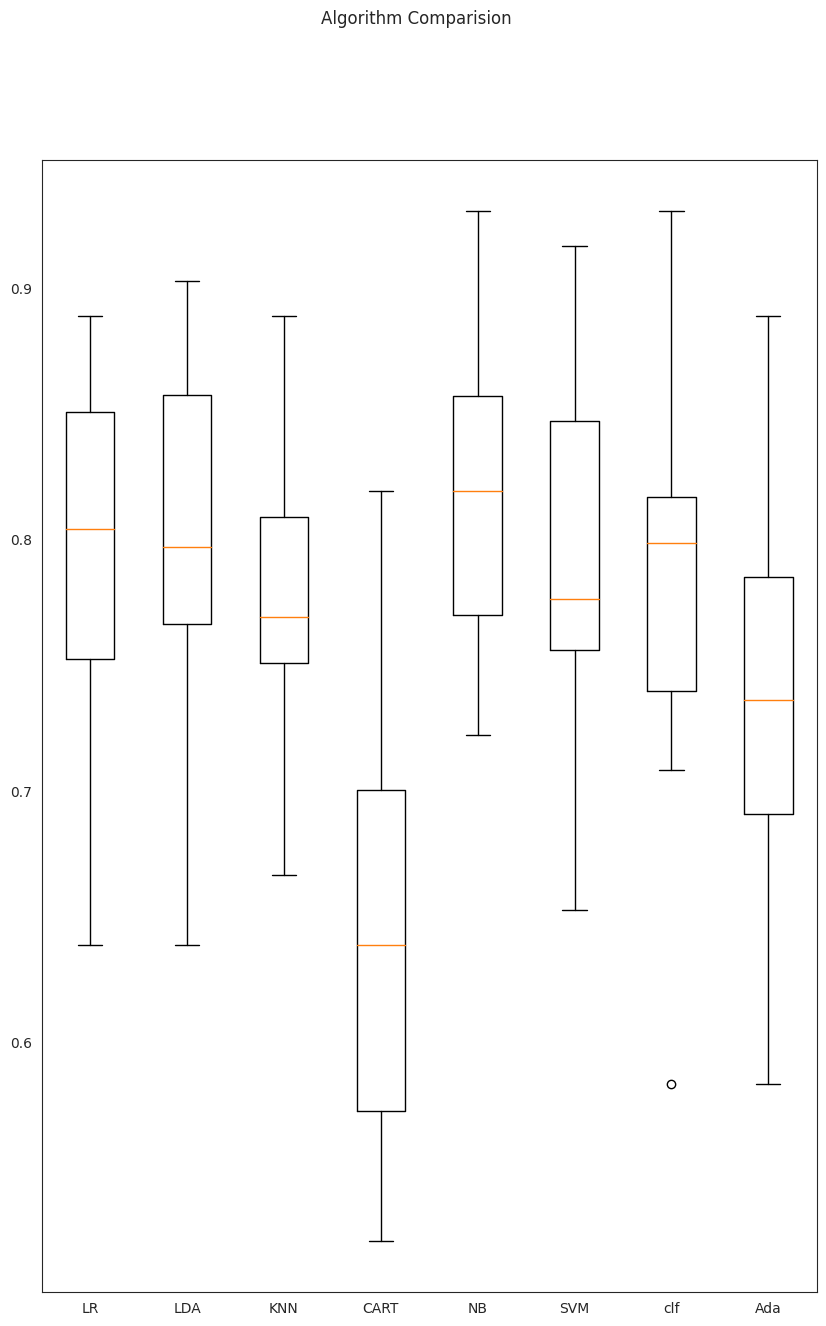

In [114]:
#compare algorithms
fig= plt.figure()
fig.suptitle('Algorithm Comparision')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### spot-Check using the pipeline and k-fold

In [115]:
# Standardize the dataset 
pipelines = [] 
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())]))) 
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
pipelines.append(('Ada', Pipeline([('Scaler', StandardScaler()),('Ada', AdaBoostClassifier())])))
# spot-check using accuracy and cross val score
results =[]
names= []
for name, model in pipelines:
  kfold=KFold(n_splits=num_folds,random_state=seed)
  cv_results= cross_val_score(model, x_train,y_train,cv=kfold, scoring= 'accuracy')
  results.append(cv_results)
  names.append(name)
  msg= "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledLR: 0.832607 (0.032046)
ScaledLDA: 0.836146 (0.028832)
ScaledKNN: 0.834513 (0.029105)
ScaledCART: 0.787145 (0.068965)
ScaledNB: 0.836056 (0.038241)
ScaledSVM: 0.846552 (0.035202)
ScaledRF: 0.848215 (0.032177)
Ada: 0.829189 (0.029461)


performance of the algorithms improved using the standardize in the pipeline


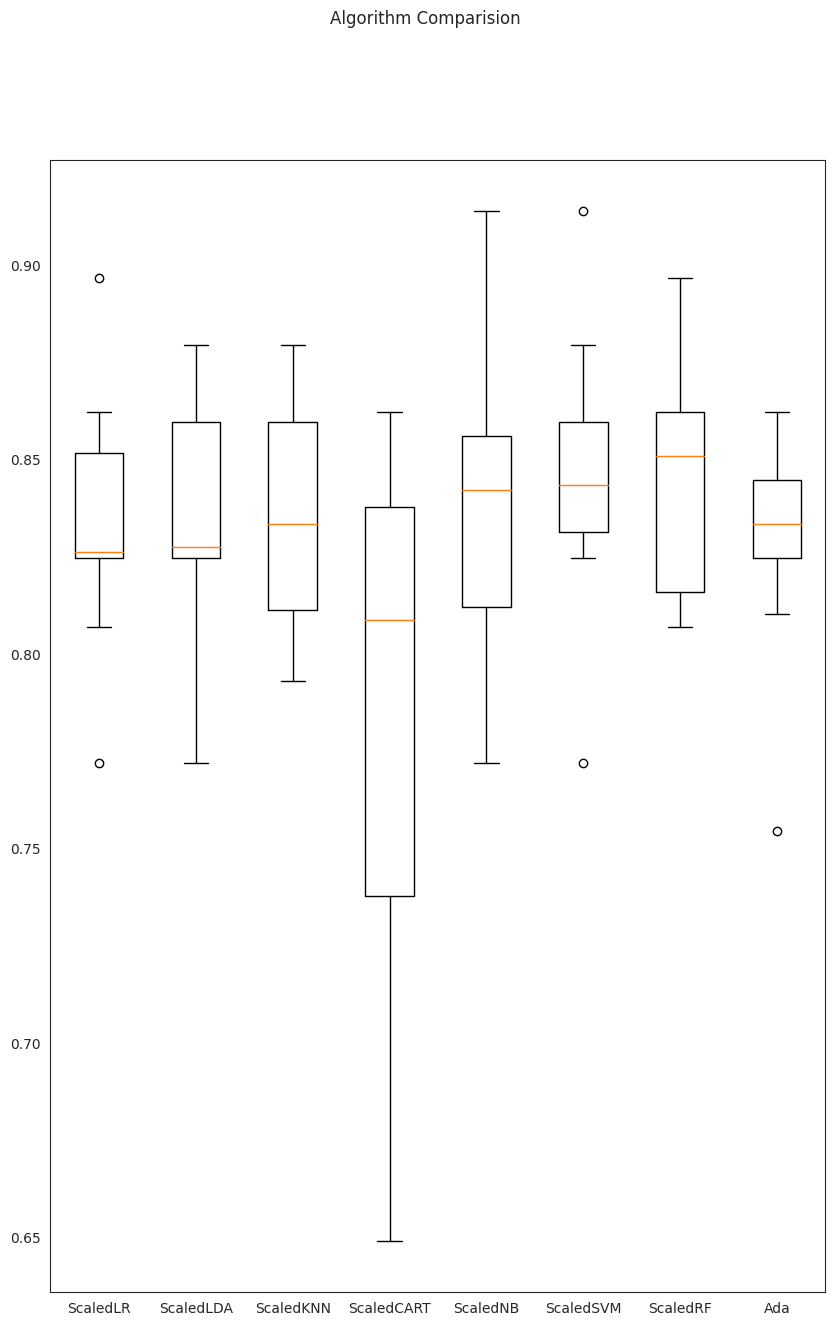

In [116]:
#compare algorithms
fig= plt.figure()
fig.suptitle('Algorithm Comparision')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#**Feature Selection**
* slelectKbest using chi2
* selectKbest using f_clssif
* RFE: recursive feature selection (selected 6 features)
* Extra tree classifier

###**SlectKbest Chi2**

In [119]:
#SelectKbest Using Chi2
from sklearn.feature_selection import SelectKBest
from numpy import set_printoptions
from sklearn.feature_selection import chi2
test=SelectKBest(score_func= chi2, k=7)
fit=test.fit(X,Y)
#summary scores
set_printoptions(precision=3)
print(fit.scores_)
features=fit.transform(X)
#summarize selected features
print(features[0:5, :])
column_selkbest=fit.scores_
column_selkbest
#["age", "sex", "cp", "trestbps","chol", "fbs", "restecg","thalach", "exang", "oldpeak", "slope", "ca", "thal"]

[  3.119  16.288  24.477   0.404   0.468   3.002   2.052   6.765 100.351
   3.848  20.464  31.059  67.167]
[[1.    0.    0.634 0.    1.    0.    0.75 ]
 [1.    1.    0.338 1.    0.5   1.    0.   ]
 [1.    1.    0.486 1.    0.5   0.667 1.   ]
 [1.    0.667 0.894 0.    1.    0.    0.   ]
 [0.    0.333 0.789 0.    0.    0.    0.   ]]


array([  3.119,  16.288,  24.477,   0.404,   0.468,   3.002,   2.052,
         6.765, 100.351,   3.848,  20.464,  31.059,  67.167])

using Selectkbest:  sex, cp, exang, slope,ca,and thal

###**SlectKbest f_classif**

In [120]:
# SelectKbest f_classif
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# define feature selection
fs = SelectKBest(score_func=f_classif, k=7)
# apply feature selection
fit= fs.fit(X,Y)
#summary scores
set_printoptions(precision=3)
print(fit.scores_)
features=fit.transform(X)
#summarize selected features
print(features[0:5, :])
column_selkbest=fit.scores_
column_selkbest

[ 46.056  68.316 233.039   7.406  13.845   3.734   3.38  140.319 191.454
 118.086 117.962 174.684 280.771]
[[0.    0.634 0.    0.557 1.    0.    0.75 ]
 [1.    0.338 1.    0.466 0.5   1.    0.   ]
 [1.    0.486 1.    0.591 0.5   0.667 1.   ]
 [0.667 0.894 0.    0.693 1.    0.    0.   ]
 [0.333 0.789 0.    0.455 0.    0.    0.   ]]


array([ 46.056,  68.316, 233.039,   7.406,  13.845,   3.734,   3.38 ,
       140.319, 191.454, 118.086, 117.962, 174.684, 280.771])

###**recursive feature selection**

In [122]:
#recursive Feature selection

# Feature Extraction with RFE

from sklearn.feature_selection import RFE

model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 6)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
column_RFE=fit.support_
column_RFE

Num Features: 6
Selected Features: [False False  True False False False False  True False  True  True  True
  True]
Feature Ranking: [5 3 1 6 2 8 7 1 4 1 1 1 1]


array([False, False,  True, False, False, False, False,  True, False,
        True,  True,  True,  True])

"oldpeak", "slope", "ca", "thal", cp, and chol, exang

###**Extra Tree classifier**

In [123]:
# Feature Importance with Extra Trees Classifier

from sklearn.ensemble import ExtraTreesClassifier
# feature extraction
model = ExtraTreesClassifier(n_estimators=13)
model.fit(X, Y)
column_ExTC= model.feature_importances_
print(column_ExTC)
#["age", "sex", "cp", "trestbps","chol", "fbs", "restecg","thalach", "exang", "oldpeak", "slope", "ca", "thal"]

[0.057 0.04  0.139 0.054 0.061 0.026 0.031 0.076 0.065 0.052 0.124 0.114
 0.16 ]


##**Summary selected features from above methods**

In [124]:

column_name= ["age", "sex", "cp", "trestbps","chol", "fbs", "restecg","thalach", "exang", "oldpeak", "slope", "ca", "thal"]
numpy_data = np.array([column_selkbest,column_RFE,column_ExTC])
df = pd.DataFrame(data=numpy_data, index=["SelectKbest", "RFE", "Extratreeclassifier"], columns=column_name)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
SelectKbest,46.056,68.316,233.039,7.406,13.845,3.734,3.380,140.319,191.454,118.086,117.962,174.684,280.771
RFE,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,1.000,1.000
Extratreeclassifier,0.057,0.040,0.139,0.054,0.061,0.026,0.031,0.076,0.065,0.052,0.124,0.114,0.160


based on all three methods: we can select sex, cp, chol, exang, slop, ca, thal
( I didnot pick thalach as it is highly correlated to thal)
another method to consider : PCA

use only selectKbest

# **Evaluation of the slected feature on the above baseline models**
* Hand selected features based on the comparison of all feature slection method
* SelectedKbest feature slection (Chi2)
* RFE on training dataset (**performing best**)
* Extratree classification (**performing best**)
* SelectKBest (F_classif) on training set
* PCA (...need to change X to X-train ,... got little lazy to run the entirefile)




In [127]:
# Hand selected features based on above three methods and their performance  on training dataset
sex_df=(Final_DF['sex'])
cp_df=(Final_DF['cp'])
chol_df=(Final_DF['chol'])
exang_df=(Final_DF['exang'])
slop_df=(Final_DF['slope'])
ca_df=(Final_DF['ca'])
thal_df=Final_DF['thal']
df_feat_sel = pd.concat([sex_df, cp_df,chol_df,exang_df,slop_df,ca_df,thal_df], axis=1)
array_feature_sel=df_feat_sel.values
array_feature_sel
#test-train
array=Final_DF.values

Y=array[:,13]
seed=7
x_fet_train, x_fet_test, y_fet_train, y_fet_test = train_test_split(array_feature_sel, Y, test_size=0.20, random_state=seed)
# Standardize the dataset 
pipelines = [] 
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())]))) 
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
pipelines.append(('Ada', Pipeline([('Scaler', StandardScaler()),('Ada', AdaBoostClassifier())])))
# spot-check using accuracy and cross val score
results =[]
names= []
for name, model in pipelines:
  kfold=KFold(n_splits=num_folds,random_state=seed)
  cv_results= cross_val_score(model, x_fet_train,y_fet_train,cv=kfold, scoring= 'accuracy')
  results.append(cv_results)
  names.append(name)
  msg= "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledLR: 0.824077 (0.030433)
ScaledLDA: 0.825802 (0.028048)
ScaledKNN: 0.830823 (0.045441)
ScaledCART: 0.770085 (0.038484)
ScaledNB: 0.825802 (0.030198)
ScaledSVM: 0.841440 (0.028871)
ScaledRF: 0.836056 (0.030243)
Ada: 0.827586 (0.033132)


In [129]:
# SelectKbest features and their performance  on training dataset
thalach_df=(Final_DF['thalach'])
cp_df=(Final_DF['cp'])
exang_df=(Final_DF['exang'])
slop_df=(Final_DF['slope'])
ca_df=(Final_DF['ca'])
thal_df=Final_DF['thal']
oldpeak_df=Final_DF['oldpeak']
df_feat_sel = pd.concat([thalach_df, cp_df,exang_df,slop_df,ca_df,thal_df,oldpeak_df], axis=1)
array_feature_sel=df_feat_sel.values
array_feature_sel
#test-train
array=Final_DF.values

Y=array[:,13]
seed=7
x_fet_train, x_fet_test, y_fet_train, y_fet_test = train_test_split(array_feature_sel, Y, test_size=0.20, random_state=seed)
# Standardize the dataset 
pipelines = [] 
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())]))) 
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
pipelines.append(('Ada', Pipeline([('Scaler', StandardScaler()),('Ada', AdaBoostClassifier())])))
# spot-check using accuracy and cross val score
results =[]
names= []
for name, model in pipelines:
  kfold=KFold(n_splits=num_folds,random_state=seed)
  cv_results= cross_val_score(model, x_fet_train,y_fet_train,cv=kfold, scoring= 'accuracy')
  results.append(cv_results)
  names.append(name)
  msg= "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledLR: 0.844858 (0.035544)
ScaledLDA: 0.841379 (0.033842)
ScaledKNN: 0.818542 (0.047982)
ScaledCART: 0.748972 (0.053249)
ScaledNB: 0.841258 (0.037633)
ScaledSVM: 0.844858 (0.031893)
ScaledRF: 0.829189 (0.028397)
Ada: 0.818814 (0.033173)


In [130]:
# RFE features selected on above three methods and their performance  on training dataset
oldpeak_df=(Final_DF['oldpeak'])
cp_df=(Final_DF['cp'])
chol_df=(Final_DF['chol'])
#exang_df=(Final_DF['exang'])
slop_df=(Final_DF['slope'])
ca_df=(Final_DF['ca'])
thal_df=Final_DF['thal']
df_feat_sel = pd.concat([oldpeak_df, cp_df,chol_df,slop_df,ca_df,thal_df], axis=1)
array_feature_sel=df_feat_sel.values
array_feature_sel
#test-train
array=Final_DF.values

Y=array[:,13]
seed=7
x_fet_train, x_fet_test, y_fet_train, y_fet_test = train_test_split(array_feature_sel, Y, test_size=0.20, random_state=seed)
# Standardize the dataset 
pipelines = [] 
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())]))) 
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
pipelines.append(('Ada', Pipeline([('Scaler', StandardScaler()),('Ada', AdaBoostClassifier())])))
# spot-check using accuracy and cross val score
results =[]
names= []
for name, model in pipelines:
  kfold=KFold(n_splits=num_folds,random_state=seed)
  cv_results= cross_val_score(model, x_fet_train,y_fet_train,cv=kfold, scoring= 'accuracy')
  results.append(cv_results)
  names.append(name)
  msg= "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledLR: 0.832759 (0.022310)
ScaledLDA: 0.827556 (0.036933)
ScaledKNN: 0.844767 (0.047706)
ScaledCART: 0.766394 (0.041140)
ScaledNB: 0.839837 (0.027117)
ScaledSVM: 0.848397 (0.033323)
ScaledRF: 0.834332 (0.033927)
Ada: 0.830823 (0.030202)


In [131]:
# Extratreeclassifier features selected on above three methods and their performance  on training dataset
oldpeak_df=(Final_DF['oldpeak'])
cp_df=(Final_DF['cp'])
chol_df=(Final_DF['chol'])
exang_df=(Final_DF['exang'])
#slop_df=(Final_DF['slope'])
ca_df=(Final_DF['ca'])
thal_df=Final_DF['thal']
df_feat_sel = pd.concat([oldpeak_df, cp_df,chol_df,slop_df,ca_df,thal_df], axis=1)
array_feature_sel=df_feat_sel.values
array_feature_sel
#test-train
array=Final_DF.values

Y=array[:,13]
seed=7
x_fet_train, x_fet_test, y_fet_train, y_fet_test = train_test_split(array_feature_sel, Y, test_size=0.20, random_state=seed)
# Standardize the dataset 
pipelines = [] 
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())]))) 
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
pipelines.append(('Ada', Pipeline([('Scaler', StandardScaler()),('Ada', AdaBoostClassifier())])))
# spot-check using accuracy and cross val score
results =[]
names= []
for name, model in pipelines:
  kfold=KFold(n_splits=num_folds,random_state=seed)
  cv_results= cross_val_score(model, x_fet_train,y_fet_train,cv=kfold, scoring= 'accuracy')
  results.append(cv_results)
  names.append(name)
  msg= "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledLR: 0.832759 (0.022310)
ScaledLDA: 0.827556 (0.036933)
ScaledKNN: 0.844767 (0.047706)
ScaledCART: 0.759377 (0.040468)
ScaledNB: 0.839837 (0.027117)
ScaledSVM: 0.848397 (0.033323)
ScaledRF: 0.832638 (0.024254)
Ada: 0.830823 (0.030202)


In [133]:
#SelectkBest using classif features selected on above three methods and their performance  on training dataset
#[ "cp", thalach", "exang", "oldpeak", "slope", "ca", "thal"]
oldpeak_df=(Final_DF['oldpeak'])
cp_df=(Final_DF['cp'])
chol_df=(Final_DF['thalach'])
exang_df=(Final_DF['exang'])
slop_df=(Final_DF['slope'])
ca_df=(Final_DF['ca'])
thal_df=Final_DF['thal']
df_feat_sel = pd.concat([oldpeak_df, cp_df,chol_df,slop_df,ca_df,thal_df], axis=1)
array_feature_sel=df_feat_sel.values
array_feature_sel
#test-train
array=Final_DF.values

Y=array[:,13]
seed=7
x_fet_train, x_fet_test, y_fet_train, y_fet_test = train_test_split(array_feature_sel, Y, test_size=0.20, random_state=seed)
# Standardize the dataset 
pipelines = [] 
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())]))) 
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
pipelines.append(('Ada', Pipeline([('Scaler', StandardScaler()),('Ada', AdaBoostClassifier())])))
# spot-check using accuracy and cross val score
results =[]
names= []
for name, model in pipelines:
  kfold=KFold(n_splits=num_folds,random_state=seed)
  cv_results= cross_val_score(model, x_fet_train,y_fet_train,cv=kfold, scoring= 'accuracy')
  results.append(cv_results)
  names.append(name)
  msg= "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledLR: 0.843164 (0.028320)
ScaledLDA: 0.831034 (0.029121)
ScaledKNN: 0.827374 (0.035226)
ScaledCART: 0.764670 (0.047645)
ScaledNB: 0.850151 (0.030346)
ScaledSVM: 0.836146 (0.029739)
ScaledRF: 0.829159 (0.038506)
Ada: 0.818814 (0.033173)


#**PCA for feature selection**

In [137]:

# evaluate pca with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression


# define the pipeline
steps = [('Scaler', StandardScaler()),('pca', PCA(n_components=3)), ('m', SVC())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=7)
n_scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.827 (0.048)


In [141]:
from sklearn.pipeline import FeatureUnion
# define the pipeline
steps = [('Scaler', StandardScaler()),('pca', PCA(n_components=3)), ('select_best',SelectKBest(k=7))]
feature_union=FeatureUnion(steps)
estimator=[]
estimator.append(('feature_union',feature_union))
estimator.append(('ada',AdaBoostClassifier()))
model = Pipeline(estimator)
# evaluate model
kfold = KFold(n_splits=10, random_state=7)
n_scores = cross_val_score(model, X, Y, cv=kfold)
# report performance
print(n_scores.mean())

0.7439749608763694


svc=0.803579, rf=0.79119